In [1]:
import numpy as np
import pandas as pd
import datetime as dt

pd.set_option('display.max_rows', 16)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 9.0)
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import gc

In [2]:
plt.rcParams['figure.figsize'] = (16.0, 9.0)

# Data

In [3]:
START = '2008-01-01'
END = '2025-04-30'

In [4]:
# Security Id
stk_info = DataAPI.SecIDGet(assetClass="E",pandas="1")
cond1 = (stk_info['exchangeCD'] == 'XSHE') | (stk_info['exchangeCD'] == 'XSHG')
cond2 = (stk_info['listStatusCD'] == 'L') | (stk_info['listStatusCD'] == 'DE')
cond3 = stk_info['transCurrCD']=='CNY'
stk_info = stk_info[cond1 & cond2 & cond3].copy()
stk_id = stk_info['secID']

In [5]:
stk_info

secID    ticker secShortName cnSpell exchangeCD assetClass  \
0        000001.XSHE    000001         平安银行    PAYH       XSHE          E   
1        000002.XSHE    000002          万科A     WKA       XSHE          E   
2        000003.XSHE    000003        PT金田A   PTJTA       XSHE          E   
3        000004.XSHE    000004         国华网安    GHWA       XSHE          E   
4        000005.XSHE    000005         ST星源    STXY       XSHE          E   
5        000006.XSHE    000006         深振业A    SZYA       XSHE          E   
6        000007.XSHE    000007          全新好     QXH       XSHE          E   
7        000008.XSHE    000008         神州高铁    SZGT       XSHE          E   
...              ...       ...          ...     ...        ...        ...   
12863    688793.XSHG    688793          倍轻松     BQS       XSHG          E   
12864    688798.XSHG    688798         艾为电子    AWDZ       XSHG          E   
12865    688799.XSHG    688799         华纳药厂    HNYC       XSHG          E   
12866    688800.XSHG    688800          瑞可达     RKD       XSHG          E   
12867    688819.XSHG    688819         天能股份    TNGF       XSHG          E   
12868    688981.XSHG    688981         中芯国际    ZXGJ       XSHG          E   
12869    689009.XSHG    689009         九号公司    JHGS       XSHG          E   
32202  DY600018.XSHG  DY600018         上港集箱    SGJX       XSHG          E   

      listStatusCD    listDate transCurrCD          ISIN     partyID  \
0                L  1991-04-03         CNY  CNE000000040         2.0   
1                L  1991-01-29         CNY  CNE0000000T2         3.0   
2               DE  1991-07-03         CNY  CNE1000031Y5         4.0   
3                L  1990-12-01         CNY  CNE0000000Y2         5.0   
4               DE  1990-12-10         CNY  CNE0000001L7         6.0   
5                L  1992-04-27         CNY  CNE000000164         7.0   
6                L  1992-04-13         CNY  CNE0000000P0         8.0   
7                L  1992-05-07         CNY  CNE0000001C6         9.0   
...            ...         ...         ...           ...         ...   
12863            L  2021-07-15         CNY           NaN     28370.0   
12864            L  2021-08-16         CNY  CNE1000050N8    330517.0   
12865            L  2021-07-13         CNY  CNE100004P73     81902.0   
12866            L  2021-07-22         CNY  CNE100004P32     97562.0   
12867            L  2021-01-18         CNY  CNE100004C29     70519.0   
12868            L  2020-07-16         CNY  CNE1000041W8  10000366.0   
12869            L  2020-10-29         CNY           NaN   1093794.0   
32202           DE  2000-07-19         CNY           NaN       618.0   

       delistDate  
0             NaN  
1             NaN  
2      2002-06-14  
3             NaN  
4      2024-04-26  
5             NaN  
6             NaN  
7             NaN  
...           ...  
12863         NaN  
12864         NaN  
12865         NaN  
12866         NaN  
12867         NaN  
12868         NaN  
12869         NaN  
32202  2006-10-20  

[5437 rows x 12 columns]

## ST

In [6]:
st_df = DataAPI.SecSTGet(beginDate=START,endDate=END,secID=stk_id,field=['secID','tradeDate','STflg'],pandas="1")

In [7]:
st_df['tradeDate'] = pd.to_datetime(st_df['tradeDate'],format="%Y-%m-%d")

## Risk free rate

In [8]:
DataAPI.MktIborGet(secID="Shibor1M.IRCN",beginDate=START,endDate=END,field=['secID','tradeDate','rate'],pandas="1")

secID   tradeDate    rate
0     Shibor1M.IRCN  2008-01-02  3.6792
1     Shibor1M.IRCN  2008-01-03  3.4737
2     Shibor1M.IRCN  2008-01-04  3.3918
3     Shibor1M.IRCN  2008-01-07  3.3197
4     Shibor1M.IRCN  2008-01-08  3.3025
5     Shibor1M.IRCN  2008-01-09  3.3371
6     Shibor1M.IRCN  2008-01-10  3.3555
7     Shibor1M.IRCN  2008-01-11  3.3419
...             ...         ...     ...
4302  Shibor1M.IRCN  2025-03-27  1.9450
4303  Shibor1M.IRCN  2025-03-28  1.9390
4304  Shibor1M.IRCN  2025-03-31  1.9280
4305  Shibor1M.IRCN  2025-04-01  1.9160
4306  Shibor1M.IRCN  2025-04-02  1.9050
4307  Shibor1M.IRCN  2025-04-03  1.8650
4308  Shibor1M.IRCN  2025-04-07  1.8190
4309  Shibor1M.IRCN  2025-04-08  1.8110

[4310 rows x 3 columns]

In [9]:
shibor_df = DataAPI.MktIborGet(secID="Shibor1M.IRCN",beginDate=START,endDate=END,field=['secID','tradeDate','rate'],pandas="1")
shibor_df['rate'] = shibor_df['rate']*0.01/12
shibor_df['tradeDate'] = pd.to_datetime(shibor_df['tradeDate'])
shibor_df.drop('secID',axis=1,inplace=True)
shibor_df.rename(columns={'rate':'rf'},inplace=True)
shibor_df['ym'] = shibor_df['tradeDate'].dt.to_period('M')
shibor_df.sort_values('tradeDate',inplace=True)
shibor_df_m = shibor_df.groupby('ym',as_index=False).last()
shibor_df_m.drop('tradeDate',axis=1,inplace=True)
shibor_df_m

ym        rf
0    2008-01  0.002949
1    2008-02  0.002946
2    2008-03  0.002746
3    2008-04  0.002862
4    2008-05  0.002953
5    2008-06  0.003113
6    2008-07  0.002806
7    2008-08  0.002681
..       ...       ...
200  2024-09  0.001517
201  2024-10  0.001517
202  2024-11  0.001477
203  2024-12  0.001401
204  2025-01  0.001422
205  2025-02  0.001557
206  2025-03  0.001607
207  2025-04  0.001509

[208 rows x 2 columns]

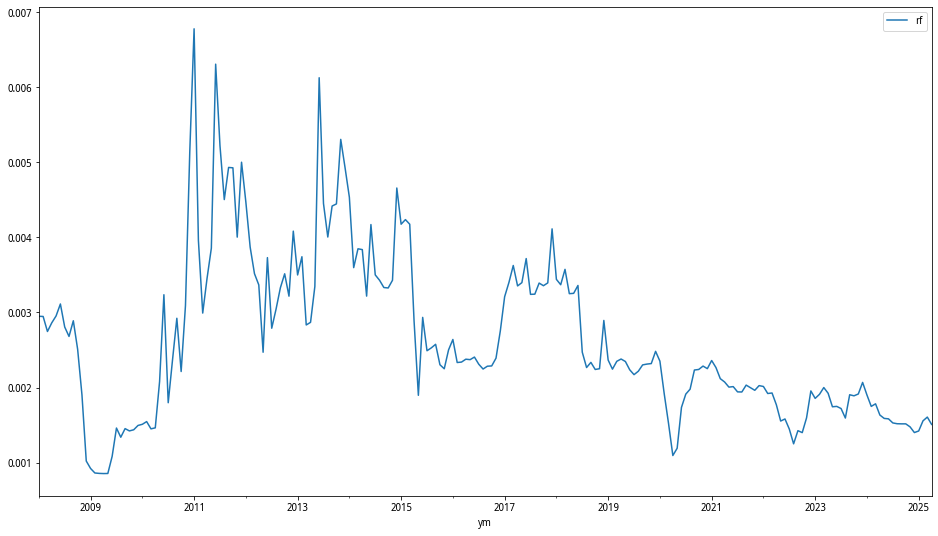

In [10]:
shibor_df_m.set_index('ym').plot()

## Beta

In [11]:
# %%time
# # About 4 min 41s
# # # 从优矿下载 beta，时间较长。由于优矿的限制，每次下载3年的数据

# beta = {}
# begin_ = 2008
# end_ = 2010
# while begin_ <= 2025:
#     if begin_ == 2025:
#         yesterday = dt.datetime.today() - dt.timedelta(days=1)
#         yesterday.strftime('%Y%m%d')
#         beta[begin_] = DataAPI.MktStockFactorsDateRangeProGet(secID=stk_id,
#                                                      beginDate=f'{begin_}0101',
#                                                      endDate=yesterday,
#                                                      field=['secID','tradeDate','Beta252'],pandas="1")
#     else:
#         beta[begin_] = DataAPI.MktStockFactorsDateRangeProGet(secID=stk_id,
#                                                          beginDate=f'{begin_}0101',
#                                                          endDate=f'{end_}1231',
#                                                          field=['secID','tradeDate','Beta252'],pandas="1")
#     begin_ = end_ + 1
#     end_ = begin_ + 3
    
# for i in range(len(beta)):
#     beta_df = pd.DataFrame(np.vstack([_df for _df in beta.values()]),columns=['secID','tradeDate','Beta252'])
    


In [12]:
# beta_df.to_pickle('./data/beta_df.pkl')

In [13]:
beta_df = pd.read_pickle('./data/beta_df.pkl')
beta_df['tradeDate'] = pd.to_datetime(beta_df['tradeDate'], format="%Y-%m-%d")
beta_df['ym'] = beta_df['tradeDate'].dt.to_period('M')
beta_df['Beta252'] = pd.to_numeric(beta_df['Beta252'])
# Winsorization
# up_q = 0.99999
# lower_q = 0.00001
# beta_df['Beta252_winsor'] = beta_df['Beta252'].clip(lower=beta_df['Beta252'].quantile(lower_q),upper=beta_df['Beta252'].quantile(up_q))
# Monthly
beta_df_m = beta_df.groupby(['secID','ym'],as_index=False)['Beta252'].last()
beta_df_m.rename(columns={'Beta252':'beta'},inplace=True)
beta_df_m

secID       ym    beta
0       000001.XSHE  2008-01  0.9654
1       000001.XSHE  2008-02  1.0292
2       000001.XSHE  2008-03  1.0238
3       000001.XSHE  2008-04  1.0212
4       000001.XSHE  2008-05  1.0697
5       000001.XSHE  2008-06  1.0672
6       000001.XSHE  2008-07  1.0966
7       000001.XSHE  2008-08  1.0386
...             ...      ...     ...
668784  689009.XSHG  2024-09  1.0361
668785  689009.XSHG  2024-10  1.3022
668786  689009.XSHG  2024-11  1.2585
668787  689009.XSHG  2024-12  1.2255
668788  689009.XSHG  2025-01  1.1695
668789  689009.XSHG  2025-02  1.2526
668790  689009.XSHG  2025-03  1.3115
668791  689009.XSHG  2025-04  1.5641

[668792 rows x 3 columns]

## Trading data

In [14]:
# %%time
# # About 12 mins
# # # 从优矿下载股票信息，时间较长。由于优矿的限制，每次下载3年的数据

# stk_dict = {}
# begin_ = dt.datetime.strptime(START, '%Y-%m-%d').year
# end_ = dt.datetime.strptime(START, '%Y-%m-%d').year+3
# field = ['secID','tradeDate','preClosePrice','closePrice','negMarketValue','turnoverValue','turnoverRate']
# while begin_ <= 2025:
#     if begin_ == 2025:
#         yesterday = dt.datetime.today() - dt.timedelta(days=1)
#         yesterday.strftime('%Y%m%d')
#         stk_dict[begin_] = DataAPI.MktEqudAdjAfGet(secID=stk_id,
#                                                      beginDate=f'{begin_}0101',
#                                                      endDate=yesterday,
#                                                      field=field,pandas="1")
#     else:
#         stk_dict[begin_] = DataAPI.MktEqudAdjAfGet(secID=stk_id,
#                                                          beginDate=f'{begin_}0101',
#                                                          endDate=f'{end_}1231',
#                                                          field=field,pandas="1")
#     begin_ = end_ + 1
#     end_ = begin_ + 3
    
# for i in range(len(stk_dict)):
#     stk_df = pd.DataFrame(np.vstack([_df for _df in stk_dict.values()]),columns=field)
    
# stk_df.to_pickle('./data/stk_df.pkl')

In [15]:
# stk_df

In [16]:
stk_df = pd.read_pickle('./data/stk_df.pkl')
stk_df['tradeDate'] = pd.to_datetime(stk_df['tradeDate'], format='%Y-%m-%d')
stk_df['ym'] = stk_df['tradeDate'].dt.to_period('M')
stk_df.sort_values(['secID','tradeDate'],inplace=True)
# drop ST stocks
print(stk_df.shape)
stk_df = pd.merge(stk_df, st_df, on=['secID','tradeDate'],how='left')
stk_df = stk_df[stk_df['STflg'].isna()].copy()
stk_df.drop('STflg',axis=1,inplace=True)
print(stk_df.shape)

(13411003, 8)
(12878387, 8)


In [17]:
# Monthly
stk_df_m = stk_df.groupby(['secID','ym'],as_index=False).last()
stk_df_m

secID       ym  tradeDate  preClosePrice  closePrice  \
0       000001.XSHE  2008-01 2008-01-31       1074.347    1053.778   
1       000001.XSHE  2008-02 2008-02-29       1037.956    1049.032   
2       000001.XSHE  2008-03 2008-03-31        918.971     892.389   
3       000001.XSHE  2008-04 2008-04-30        884.478     937.325   
4       000001.XSHE  2008-05 2008-05-30        789.543     798.403   
5       000001.XSHE  2008-06 2008-06-30        615.179     611.698   
6       000001.XSHE  2008-07 2008-07-31        681.317     658.216   
7       000001.XSHE  2008-08 2008-08-29        635.115     639.229   
...             ...      ...        ...            ...         ...   
643394  689009.XSHG  2024-09 2024-09-30         43.333      48.540   
643395  689009.XSHG  2024-10 2024-10-31         44.904      44.612   
643396  689009.XSHG  2024-11 2024-11-29         43.434      44.813   
643397  689009.XSHG  2024-12 2024-12-31         48.469      47.835   
643398  689009.XSHG  2025-01 2025-01-27         53.514      51.702   
643399  689009.XSHG  2025-02 2025-02-28         58.409      57.553   
643400  689009.XSHG  2025-03 2025-03-31         65.609      65.659   
643401  689009.XSHG  2025-04 2025-04-07         63.444      53.665   

        negMarketValue  turnoverValue  turnoverRate  
0         5.850212e+10   5.328429e+08        0.0089  
1         5.823860e+10   2.267900e+08        0.0039  
2         4.954234e+10   6.155862e+08        0.0123  
3         5.203702e+10   9.029705e+08        0.0176  
4         4.432458e+10   2.049950e+08        0.0046  
5         4.140495e+10   3.618398e+08        0.0088  
6         4.455369e+10   2.188600e+08        0.0048  
7         4.326849e+10   3.096257e+08        0.0071  
...                ...            ...           ...  
643394    2.633272e+10   1.248639e+09        0.0490  
643395    2.420206e+10   3.709377e+08        0.0153  
643396    2.431436e+10   4.117342e+08        0.0170  
643397    2.610548e+10   3.727989e+08        0.0142  
643398    2.822514e+10   6.545678e+08        0.0236  
643399    3.141930e+10   5.978337e+08        0.0190  
643400    3.584494e+10   5.167717e+08        0.0144  
643401    2.929719e+10   1.006334e+09        0.0336  

[643402 rows x 8 columns]

#### 新股上市后首月交易不考虑

需要考虑2008年后上市的股票。因为数据从2008开始，有一些在此之前上市的股票无需处理。

思路：找到每只股票的上市日期。用最早的数据时间跟其比较

In [18]:
stk_info

secID    ticker secShortName cnSpell exchangeCD assetClass  \
0        000001.XSHE    000001         平安银行    PAYH       XSHE          E   
1        000002.XSHE    000002          万科A     WKA       XSHE          E   
2        000003.XSHE    000003        PT金田A   PTJTA       XSHE          E   
3        000004.XSHE    000004         国华网安    GHWA       XSHE          E   
4        000005.XSHE    000005         ST星源    STXY       XSHE          E   
5        000006.XSHE    000006         深振业A    SZYA       XSHE          E   
6        000007.XSHE    000007          全新好     QXH       XSHE          E   
7        000008.XSHE    000008         神州高铁    SZGT       XSHE          E   
...              ...       ...          ...     ...        ...        ...   
12863    688793.XSHG    688793          倍轻松     BQS       XSHG          E   
12864    688798.XSHG    688798         艾为电子    AWDZ       XSHG          E   
12865    688799.XSHG    688799         华纳药厂    HNYC       XSHG          E   
12866    688800.XSHG    688800          瑞可达     RKD       XSHG          E   
12867    688819.XSHG    688819         天能股份    TNGF       XSHG          E   
12868    688981.XSHG    688981         中芯国际    ZXGJ       XSHG          E   
12869    689009.XSHG    689009         九号公司    JHGS       XSHG          E   
32202  DY600018.XSHG  DY600018         上港集箱    SGJX       XSHG          E   

      listStatusCD    listDate transCurrCD          ISIN     partyID  \
0                L  1991-04-03         CNY  CNE000000040         2.0   
1                L  1991-01-29         CNY  CNE0000000T2         3.0   
2               DE  1991-07-03         CNY  CNE1000031Y5         4.0   
3                L  1990-12-01         CNY  CNE0000000Y2         5.0   
4               DE  1990-12-10         CNY  CNE0000001L7         6.0   
5                L  1992-04-27         CNY  CNE000000164         7.0   
6                L  1992-04-13         CNY  CNE0000000P0         8.0   
7                L  1992-05-07         CNY  CNE0000001C6         9.0   
...            ...         ...         ...           ...         ...   
12863            L  2021-07-15         CNY           NaN     28370.0   
12864            L  2021-08-16         CNY  CNE1000050N8    330517.0   
12865            L  2021-07-13         CNY  CNE100004P73     81902.0   
12866            L  2021-07-22         CNY  CNE100004P32     97562.0   
12867            L  2021-01-18         CNY  CNE100004C29     70519.0   
12868            L  2020-07-16         CNY  CNE1000041W8  10000366.0   
12869            L  2020-10-29         CNY           NaN   1093794.0   
32202           DE  2000-07-19         CNY           NaN       618.0   

       delistDate  
0             NaN  
1             NaN  
2      2002-06-14  
3             NaN  
4      2024-04-26  
5             NaN  
6             NaN  
7             NaN  
...           ...  
12863         NaN  
12864         NaN  
12865         NaN  
12866         NaN  
12867         NaN  
12868         NaN  
12869         NaN  
32202  2006-10-20  

[5437 rows x 12 columns]

In [19]:
list_date = stk_info[['secID','listDate']].copy()
list_date['listDate'] = pd.to_datetime(list_date['listDate'],format="%Y-%m-%d")
list_date['listMonth'] = list_date['listDate'].dt.to_period('M')
# list_date

stk_df_m = pd.merge(stk_df_m,list_date[['secID','listMonth']],on='secID')
stk_df_m

secID       ym  tradeDate  preClosePrice  closePrice  \
0       000001.XSHE  2008-01 2008-01-31       1074.347    1053.778   
1       000001.XSHE  2008-02 2008-02-29       1037.956    1049.032   
2       000001.XSHE  2008-03 2008-03-31        918.971     892.389   
3       000001.XSHE  2008-04 2008-04-30        884.478     937.325   
4       000001.XSHE  2008-05 2008-05-30        789.543     798.403   
5       000001.XSHE  2008-06 2008-06-30        615.179     611.698   
6       000001.XSHE  2008-07 2008-07-31        681.317     658.216   
7       000001.XSHE  2008-08 2008-08-29        635.115     639.229   
...             ...      ...        ...            ...         ...   
643394  689009.XSHG  2024-09 2024-09-30         43.333      48.540   
643395  689009.XSHG  2024-10 2024-10-31         44.904      44.612   
643396  689009.XSHG  2024-11 2024-11-29         43.434      44.813   
643397  689009.XSHG  2024-12 2024-12-31         48.469      47.835   
643398  689009.XSHG  2025-01 2025-01-27         53.514      51.702   
643399  689009.XSHG  2025-02 2025-02-28         58.409      57.553   
643400  689009.XSHG  2025-03 2025-03-31         65.609      65.659   
643401  689009.XSHG  2025-04 2025-04-07         63.444      53.665   

        negMarketValue  turnoverValue  turnoverRate listMonth  
0         5.850212e+10   5.328429e+08        0.0089   1991-04  
1         5.823860e+10   2.267900e+08        0.0039   1991-04  
2         4.954234e+10   6.155862e+08        0.0123   1991-04  
3         5.203702e+10   9.029705e+08        0.0176   1991-04  
4         4.432458e+10   2.049950e+08        0.0046   1991-04  
5         4.140495e+10   3.618398e+08        0.0088   1991-04  
6         4.455369e+10   2.188600e+08        0.0048   1991-04  
7         4.326849e+10   3.096257e+08        0.0071   1991-04  
...                ...            ...           ...       ...  
643394    2.633272e+10   1.248639e+09        0.0490   2020-10  
643395    2.420206e+10   3.709377e+08        0.0153   2020-10  
643396    2.431436e+10   4.117342e+08        0.0170   2020-10  
643397    2.610548e+10   3.727989e+08        0.0142   2020-10  
643398    2.822514e+10   6.545678e+08        0.0236   2020-10  
643399    3.141930e+10   5.978337e+08        0.0190   2020-10  
643400    3.584494e+10   5.167717e+08        0.0144   2020-10  
643401    2.929719e+10   1.006334e+09        0.0336   2020-10  

[643402 rows x 9 columns]

In [20]:
# 随机检查
stk_df_m[stk_df_m['secID']==np.random.choice(stk_df_m['secID'],1)[0]]

secID       ym  tradeDate  preClosePrice  closePrice  \
277229  300187.XSHE  2011-03 2011-03-31         46.340      47.540   
277230  300187.XSHE  2011-04 2011-04-29         47.330      48.370   
277231  300187.XSHE  2011-05 2011-05-31         49.398      51.175   
277232  300187.XSHE  2011-06 2011-06-30         52.711      54.699   
277233  300187.XSHE  2011-07 2011-07-29         60.703      60.141   
277234  300187.XSHE  2011-08 2011-08-31         56.226      54.719   
277235  300187.XSHE  2011-09 2011-09-30         47.681      47.219   
277236  300187.XSHE  2011-10 2011-10-31         52.029      51.155   
...             ...      ...        ...            ...         ...   
277391  300187.XSHE  2024-09 2024-09-30         45.401      51.357   
277392  300187.XSHE  2024-10 2024-10-31         51.357      52.626   
277393  300187.XSHE  2024-11 2024-11-29         54.970      54.579   
277394  300187.XSHE  2024-12 2024-12-31         49.990      49.307   
277395  300187.XSHE  2025-01 2025-01-27         47.452      48.037   
277396  300187.XSHE  2025-02 2025-02-28         49.697      48.330   
277397  300187.XSHE  2025-03 2025-03-31         50.478      49.404   
277398  300187.XSHE  2025-04 2025-04-07         50.771      41.691   

        negMarketValue  turnoverValue  turnoverRate listMonth  
277229    6.370360e+08   3.656537e+07        0.0577   2011-03  
277230    6.481580e+08   4.682935e+06        0.0073   2011-03  
277231    6.829980e+08   1.000095e+07        0.0148   2011-03  
277232    9.098160e+08   2.681303e+07        0.0303   2011-03  
277233    1.000330e+09   4.066351e+07        0.0409   2011-03  
277234    9.101500e+08   2.140171e+07        0.0233   2011-03  
277235    7.854010e+08   3.800895e+06        0.0048   2011-03  
277236    8.508650e+08   2.562171e+07        0.0300   2011-03  
...                ...            ...           ...       ...  
277391    3.391752e+09   1.062420e+08        0.0327   2011-03  
277392    3.475578e+09   5.378005e+07        0.0154   2011-03  
277393    3.604542e+09   6.448784e+07        0.0180   2011-03  
277394    3.256339e+09   2.358981e+07        0.0072   2011-03  
277395    3.172513e+09   2.575665e+07        0.0080   2011-03  
277396    3.191858e+09   2.794291e+07        0.0087   2011-03  
277397    3.262788e+09   3.290832e+07        0.0101   2011-03  
277398    2.753380e+09   6.571669e+07        0.0223   2011-03  

[170 rows x 9 columns]

In [21]:
stk_listMonth = stk_df_m.groupby('secID')[['ym','listMonth']].first()
stk_listMonth['listm_dist'] = stk_listMonth['ym'] - stk_listMonth['listMonth']
# pandas 版本太久
stk_listMonth['listm_dist'] = stk_listMonth['listm_dist'].apply(lambda x: x.n)

In [22]:
stk_listMonth['listm_dist'].value_counts()

0      3846
127      38
168      32
134      27
85       26
128      23
129      22
43       22
       ... 
225       1
233       1
237       1
241       1
245       1
261       1
269       1
263       1
Name: listm_dist, Length: 213, dtype: int64

In [23]:
# # 上市日期在样本内的新上市股票
# stk_listMonth.loc[stk_listMonth['listm_dist'] < 1]

# newlist_secID = stk_listMonth.loc[stk_listMonth['listm_dist'] < 1].index
# newlist_secID

# stk_df_m.loc[stk_df_m['secID'].isin(newlist_secID)]

# temp = stk_df_m.loc[stk_df_m['secID'].isin(newlist_secID)].copy()

# temp['ret'] = temp.groupby('secID',as_index=False)['closePrice'].apply(lambda x: x / x.shift() - 1).values

# temp.dropna().groupby('secID')['ret'].first().mean()

In [24]:
stk_listMonth

ym listMonth  listm_dist
secID                                     
000001.XSHE  2008-01   1991-04         201
000002.XSHE  2008-01   1991-01         204
000004.XSHE  2011-06   1990-12         246
000005.XSHE  2008-06   1990-12         210
000006.XSHE  2008-01   1992-04         189
000007.XSHE  2012-05   1992-04         241
000008.XSHE  2013-04   1992-05         251
000009.XSHE  2008-05   1991-06         203
...              ...       ...         ...
688789.XSHG  2021-07   2021-07           0
688793.XSHG  2021-07   2021-07           0
688798.XSHG  2021-08   2021-08           0
688799.XSHG  2021-07   2021-07           0
688800.XSHG  2021-07   2021-07           0
688819.XSHG  2021-01   2021-01           0
688981.XSHG  2020-07   2020-07           0
689009.XSHG  2020-10   2020-10           0

[5373 rows x 3 columns]

In [25]:
stk_df_m_inclIPO = stk_df_m.copy()

In [26]:
# 上市日期在样本内的新上市股票
stk_listMonth.loc[stk_listMonth['listm_dist'] < 1]

newlist_secID = stk_listMonth.loc[stk_listMonth['listm_dist'] < 1].index
newlist_secID

# 每只股票丢掉第一个观测值
temp = stk_df_m.loc[stk_df_m['secID'].isin(newlist_secID)].groupby('secID').apply(lambda x: x.iloc[1:]).drop('secID',axis=1).reset_index().drop('level_1',axis=1)

stk_df_m = pd.concat([stk_df_m.loc[~stk_df_m['secID'].isin(newlist_secID)],temp],axis=0).reset_index(drop=True)

# stk_df_m.drop('listMonth',axis=1,inplace=True)
stk_df_m = stk_df_m.sort_values(['secID', 'ym']).reset_index(drop=True)
stk_df_m

secID       ym  tradeDate  preClosePrice  closePrice  \
0       000001.XSHE  2008-01 2008-01-31       1074.347    1053.778   
1       000001.XSHE  2008-02 2008-02-29       1037.956    1049.032   
2       000001.XSHE  2008-03 2008-03-31        918.971     892.389   
3       000001.XSHE  2008-04 2008-04-30        884.478     937.325   
4       000001.XSHE  2008-05 2008-05-30        789.543     798.403   
5       000001.XSHE  2008-06 2008-06-30        615.179     611.698   
6       000001.XSHE  2008-07 2008-07-31        681.317     658.216   
7       000001.XSHE  2008-08 2008-08-29        635.115     639.229   
...             ...      ...        ...            ...         ...   
639548  689009.XSHG  2024-09 2024-09-30         43.333      48.540   
639549  689009.XSHG  2024-10 2024-10-31         44.904      44.612   
639550  689009.XSHG  2024-11 2024-11-29         43.434      44.813   
639551  689009.XSHG  2024-12 2024-12-31         48.469      47.835   
639552  689009.XSHG  2025-01 2025-01-27         53.514      51.702   
639553  689009.XSHG  2025-02 2025-02-28         58.409      57.553   
639554  689009.XSHG  2025-03 2025-03-31         65.609      65.659   
639555  689009.XSHG  2025-04 2025-04-07         63.444      53.665   

        negMarketValue  turnoverValue  turnoverRate listMonth  
0         5.850212e+10   5.328429e+08        0.0089   1991-04  
1         5.823860e+10   2.267900e+08        0.0039   1991-04  
2         4.954234e+10   6.155862e+08        0.0123   1991-04  
3         5.203702e+10   9.029705e+08        0.0176   1991-04  
4         4.432458e+10   2.049950e+08        0.0046   1991-04  
5         4.140495e+10   3.618398e+08        0.0088   1991-04  
6         4.455369e+10   2.188600e+08        0.0048   1991-04  
7         4.326849e+10   3.096257e+08        0.0071   1991-04  
...                ...            ...           ...       ...  
639548    2.633272e+10   1.248639e+09        0.0490   2020-10  
639549    2.420206e+10   3.709377e+08        0.0153   2020-10  
639550    2.431436e+10   4.117342e+08        0.0170   2020-10  
639551    2.610548e+10   3.727989e+08        0.0142   2020-10  
639552    2.822514e+10   6.545678e+08        0.0236   2020-10  
639553    3.141930e+10   5.978337e+08        0.0190   2020-10  
639554    3.584494e+10   5.167717e+08        0.0144   2020-10  
639555    2.929719e+10   1.006334e+09        0.0336   2020-10  

[639556 rows x 9 columns]

In [27]:
stk_df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639556 entries, 0 to 639555
Data columns (total 9 columns):
secID             639556 non-null object
ym                639556 non-null period[M]
tradeDate         639556 non-null datetime64[ns]
preClosePrice     639556 non-null float64
closePrice        639556 non-null float64
negMarketValue    639556 non-null float64
turnoverValue     639556 non-null float64
turnoverRate      639556 non-null float64
listMonth         639556 non-null period[M]
dtypes: datetime64[ns](1), float64(5), object(1), period[M](2)
memory usage: 43.9+ MB


In [28]:
# 随机检查
stk_df_m[stk_df_m['secID']==np.random.choice(stk_df_m['secID'],1)[0]]

secID       ym  tradeDate  preClosePrice  closePrice  \
281350  300219.XSHE  2011-06 2011-06-30         16.200      16.300   
281351  300219.XSHE  2011-07 2011-07-29         21.300      20.600   
281352  300219.XSHE  2011-08 2011-08-31         22.200      22.040   
281353  300219.XSHE  2011-09 2011-09-30         18.350      18.560   
281354  300219.XSHE  2011-10 2011-10-31         18.350      18.630   
281355  300219.XSHE  2011-11 2011-11-30         19.060      17.620   
281356  300219.XSHE  2011-12 2011-12-30         16.550      16.400   
281357  300219.XSHE  2012-01 2012-01-31         13.610      13.850   
...             ...      ...        ...            ...         ...   
281509  300219.XSHE  2024-09 2024-09-30         34.235      40.193   
281510  300219.XSHE  2024-10 2024-10-31         40.681      41.331   
281511  300219.XSHE  2024-11 2024-11-29         43.173      44.689   
281512  300219.XSHE  2024-12 2024-12-31         42.848      40.573   
281513  300219.XSHE  2025-01 2025-01-27         37.756      36.510   
281514  300219.XSHE  2025-02 2025-02-28         40.193      38.243   
281515  300219.XSHE  2025-03 2025-03-31         37.322      36.781   
281516  300219.XSHE  2025-04 2025-04-07         37.106      29.793   

        negMarketValue  turnoverValue  turnoverRate listMonth  
281350    4.075000e+08   1.685740e+07        0.0413   2011-05  
281351    5.150000e+08   4.434869e+07        0.0852   2011-05  
281352    6.832400e+08   3.757832e+07        0.0552   2011-05  
281353    5.753600e+08   5.215975e+06        0.0091   2011-05  
281354    5.775300e+08   2.367922e+07        0.0413   2011-05  
281355    5.462200e+08   3.965874e+07        0.0710   2011-05  
281356    5.084000e+08   1.628000e+07        0.0317   2011-05  
281357    4.293500e+08   1.475985e+07        0.0343   2011-05  
...                ...            ...           ...       ...  
281509    5.243238e+09   3.281824e+08        0.0668   2011-05  
281510    5.391631e+09   1.878635e+08        0.0350   2011-05  
281511    5.829745e+09   4.333430e+08        0.0753   2011-05  
281512    5.292702e+09   1.957062e+08        0.0357   2011-05  
281513    4.762725e+09   8.533885e+07        0.0175   2011-05  
281514    4.988849e+09   1.172985e+08        0.0231   2011-05  
281515    4.798057e+09   7.590288e+07        0.0159   2011-05  
281516    3.886497e+09   1.627482e+08        0.0393   2011-05  

[167 rows x 9 columns]

In [29]:
# stk_df_m.drop('listMonth',axis=1,inplace=True)

## Momentum

Momentum 介绍：

Momentum即动量，指的是过去一段时间表现较好的股票，在未来一段时间内也会较好。“过去”和“未来”有很多定义，比较常见的：
- 过去：t月前的t-12:t-2个月的累积收益率
- 未来: t月的收益

也即，中间跳过了一个月，t-1。
这是因为，短期发现了反转，reversal：上个月表现好的，这个月表现差

Momentum 的计算涉及到pandas groupby rolling。如果是自定义的函数，apply会比较慢。但新版本(pandas version >= 1)中，apply中可以指定用numba作为计算引擎，速度会快非常多。由于优矿的pandas版本很低, 没有这个选项。

另外，按照月来做rolling时，pandas rolling的选项不可以用"MonthEnd"这样长度不固定的时间作为window size。因此，如果想做得很精确的话，需要用一些其他的办法。一种比较容易的思路是把停牌的日期(用MultiIndex)填上，对应的ret值留空。窗口长度就可以固定（通过指定observation个数，而不是月份数）。

- 注意：应当先计算收益率，再填充空值。原因：
    - 如果先填充空值，刚恢复交易时的第一个月，ret会是NaN。若用0填充来得到1+ret==1，会有一定程度的失真。
    - 先计算ret，则刚恢复交易时的第一个月，ret是从刚停牌时的价格和这个月的价格相除计算得到的，较真实。
    
例：

In [30]:
stk_df.loc[(stk_df['secID']=='000001.XSHE') & (stk_df['tradeDate']>='2010-06-20') & (stk_df['tradeDate']<='2010-07-10')]

secID  tradeDate preClosePrice closePrice negMarketValue  \
600  000001.XSHE 2010-06-21       714.635    755.071    5.35113e+10   
601  000001.XSHE 2010-06-22       755.071    764.561    5.41838e+10   
602  000001.XSHE 2010-06-23       764.561    757.134    5.36575e+10   
603  000001.XSHE 2010-06-24       757.134    764.561    5.41838e+10   
604  000001.XSHE 2010-06-25       764.561    747.231    5.29557e+10   
605  000001.XSHE 2010-06-28       747.231     762.91    5.74183e+10   
606  000001.XSHE 2010-06-29        762.91    722.475     5.4375e+10   
607  000001.XSHE 2010-06-30       722.475    722.475     5.4375e+10   
608  000001.XSHE 2010-07-01       722.475    722.475     5.4375e+10   
609  000001.XSHE 2010-07-02       722.475    722.475     5.4375e+10   
610  000001.XSHE 2010-07-05       722.475    722.475     5.4375e+10   
611  000001.XSHE 2010-07-06       722.475    722.475     5.4375e+10   
612  000001.XSHE 2010-07-07       722.475    722.475     5.4375e+10   
613  000001.XSHE 2010-07-08       722.475    722.475     5.4375e+10   
614  000001.XSHE 2010-07-09       722.475    722.475     5.4375e+10   

    turnoverValue turnoverRate       ym  
600   1.06339e+09       0.0202  2010-06  
601   7.70489e+08       0.0143  2010-06  
602   5.97274e+08       0.0111  2010-06  
603   4.32905e+08        0.008  2010-06  
604   4.15194e+08       0.0078  2010-06  
605   4.48792e+08       0.0079  2010-06  
606   5.49135e+08       0.0099  2010-06  
607             0            0  2010-06  
608             0            0  2010-07  
609             0            0  2010-07  
610             0            0  2010-07  
611             0            0  2010-07  
612             0            0  2010-07  
613             0            0  2010-07  
614             0            0  2010-07

In [31]:
stk_df[(stk_df['secID']=='000007.XSHE') & (stk_df['tradeDate']>='2021-04-20')&(stk_df['tradeDate']<='2022-07-05')]

secID  tradeDate preClosePrice closePrice negMarketValue  \
23976  000007.XSHE 2021-04-20        48.845     47.521    1.22034e+09   
23977  000007.XSHE 2021-04-21        47.521     46.078    1.18327e+09   
23978  000007.XSHE 2021-04-22        46.078     45.837    1.17709e+09   
23979  000007.XSHE 2021-04-23        45.837     44.875    1.15238e+09   
23980  000007.XSHE 2021-04-26        44.875     46.439    1.19254e+09   
23981  000007.XSHE 2021-04-27        46.439     44.634     1.1462e+09   
23982  000007.XSHE 2021-04-28        44.634     47.401    1.21726e+09   
23983  000007.XSHE 2021-04-29        47.401     47.401    1.21726e+09   
24266  000007.XSHE 2022-07-01        86.982     90.351     2.3202e+09   
24267  000007.XSHE 2022-07-04        90.351     92.877    2.38508e+09   
24268  000007.XSHE 2022-07-05        92.877      89.87    2.30784e+09   

      turnoverValue turnoverRate       ym  
23976   7.95612e+07       0.0643  2021-04  
23977   4.70821e+07       0.0395  2021-04  
23978   4.16749e+07       0.0353  2021-04  
23979   5.26882e+07       0.0455  2021-04  
23980   5.47085e+07       0.0462  2021-04  
23981   5.00336e+07       0.0435  2021-04  
23982   1.25766e+08       0.1055  2021-04  
23983             0            0  2021-04  
24266   2.46446e+08       0.1069  2022-07  
24267   1.66992e+08       0.0703  2022-07  
24268   1.52662e+08       0.0651  2022-07

In [32]:
stk_df_m.groupby('secID',as_index=False)['closePrice'].apply(lambda x: x / x.shift() - 1)

0     0              NaN
      1        -0.004504
      2        -0.149321
      3         0.050355
      4        -0.148211
      5        -0.233848
      6         0.076047
      7        -0.028846
                  ...   
5371  639548    0.078307
      639549   -0.080923
      639550    0.004506
      639551    0.067436
      639552    0.080840
      639553    0.113168
      639554    0.140844
      639555   -0.182671
Name: closePrice, Length: 639556, dtype: float64

In [33]:
stk_df_m

secID       ym  tradeDate  preClosePrice  closePrice  \
0       000001.XSHE  2008-01 2008-01-31       1074.347    1053.778   
1       000001.XSHE  2008-02 2008-02-29       1037.956    1049.032   
2       000001.XSHE  2008-03 2008-03-31        918.971     892.389   
3       000001.XSHE  2008-04 2008-04-30        884.478     937.325   
4       000001.XSHE  2008-05 2008-05-30        789.543     798.403   
5       000001.XSHE  2008-06 2008-06-30        615.179     611.698   
6       000001.XSHE  2008-07 2008-07-31        681.317     658.216   
7       000001.XSHE  2008-08 2008-08-29        635.115     639.229   
...             ...      ...        ...            ...         ...   
639548  689009.XSHG  2024-09 2024-09-30         43.333      48.540   
639549  689009.XSHG  2024-10 2024-10-31         44.904      44.612   
639550  689009.XSHG  2024-11 2024-11-29         43.434      44.813   
639551  689009.XSHG  2024-12 2024-12-31         48.469      47.835   
639552  689009.XSHG  2025-01 2025-01-27         53.514      51.702   
639553  689009.XSHG  2025-02 2025-02-28         58.409      57.553   
639554  689009.XSHG  2025-03 2025-03-31         65.609      65.659   
639555  689009.XSHG  2025-04 2025-04-07         63.444      53.665   

        negMarketValue  turnoverValue  turnoverRate listMonth  
0         5.850212e+10   5.328429e+08        0.0089   1991-04  
1         5.823860e+10   2.267900e+08        0.0039   1991-04  
2         4.954234e+10   6.155862e+08        0.0123   1991-04  
3         5.203702e+10   9.029705e+08        0.0176   1991-04  
4         4.432458e+10   2.049950e+08        0.0046   1991-04  
5         4.140495e+10   3.618398e+08        0.0088   1991-04  
6         4.455369e+10   2.188600e+08        0.0048   1991-04  
7         4.326849e+10   3.096257e+08        0.0071   1991-04  
...                ...            ...           ...       ...  
639548    2.633272e+10   1.248639e+09        0.0490   2020-10  
639549    2.420206e+10   3.709377e+08        0.0153   2020-10  
639550    2.431436e+10   4.117342e+08        0.0170   2020-10  
639551    2.610548e+10   3.727989e+08        0.0142   2020-10  
639552    2.822514e+10   6.545678e+08        0.0236   2020-10  
639553    3.141930e+10   5.978337e+08        0.0190   2020-10  
639554    3.584494e+10   5.167717e+08        0.0144   2020-10  
639555    2.929719e+10   1.006334e+09        0.0336   2020-10  

[639556 rows x 9 columns]

In [34]:
stk_df_m.shape

(639556, 9)

In [35]:
stk_df_m.groupby('secID',as_index=False)['closePrice'].apply(lambda x: x / x.shift() - 1).reset_index()['closePrice']

0              NaN
1        -0.004504
2        -0.149321
3         0.050355
4        -0.148211
5        -0.233848
6         0.076047
7        -0.028846
            ...   
639548    0.078307
639549   -0.080923
639550    0.004506
639551    0.067436
639552    0.080840
639553    0.113168
639554    0.140844
639555   -0.182671
Name: closePrice, Length: 639556, dtype: float64

In [36]:
stk_df_m['ret_mom'] = stk_df_m.groupby('secID',as_index=False)['closePrice'].apply(lambda x: x / x.shift() - 1).values #这个ret_mom不用作后面ret的计算，后面仍保留monthly ret

In [37]:
stk_df_m[(stk_df_m['secID']=='000007.XSHE') & (stk_df_m['tradeDate']>='2021-04-20')&(stk_df_m['tradeDate']<='2022-09-05')]

secID       ym  tradeDate  preClosePrice  closePrice  \
1041  000007.XSHE  2021-04 2021-04-29         47.401      47.401   
1042  000007.XSHE  2022-07 2022-07-29         85.779      88.667   
1043  000007.XSHE  2022-08 2022-08-31         96.727      96.727   

      negMarketValue  turnoverValue  turnoverRate listMonth   ret_mom  
1041    1.217255e+09   0.000000e+00        0.0000   1992-04  0.018085  
1042    2.276947e+09   1.037270e+08        0.0461   1992-04  0.870572  
1043    2.483942e+09   9.637280e+07        0.0390   1992-04  0.090902

In [38]:
stk_df_m.sort_values(['secID','ym'],inplace=True)

In [39]:
stk_df_m

secID       ym  tradeDate  preClosePrice  closePrice  \
0       000001.XSHE  2008-01 2008-01-31       1074.347    1053.778   
1       000001.XSHE  2008-02 2008-02-29       1037.956    1049.032   
2       000001.XSHE  2008-03 2008-03-31        918.971     892.389   
3       000001.XSHE  2008-04 2008-04-30        884.478     937.325   
4       000001.XSHE  2008-05 2008-05-30        789.543     798.403   
5       000001.XSHE  2008-06 2008-06-30        615.179     611.698   
6       000001.XSHE  2008-07 2008-07-31        681.317     658.216   
7       000001.XSHE  2008-08 2008-08-29        635.115     639.229   
...             ...      ...        ...            ...         ...   
639548  689009.XSHG  2024-09 2024-09-30         43.333      48.540   
639549  689009.XSHG  2024-10 2024-10-31         44.904      44.612   
639550  689009.XSHG  2024-11 2024-11-29         43.434      44.813   
639551  689009.XSHG  2024-12 2024-12-31         48.469      47.835   
639552  689009.XSHG  2025-01 2025-01-27         53.514      51.702   
639553  689009.XSHG  2025-02 2025-02-28         58.409      57.553   
639554  689009.XSHG  2025-03 2025-03-31         65.609      65.659   
639555  689009.XSHG  2025-04 2025-04-07         63.444      53.665   

        negMarketValue  turnoverValue  turnoverRate listMonth   ret_mom  
0         5.850212e+10   5.328429e+08        0.0089   1991-04       NaN  
1         5.823860e+10   2.267900e+08        0.0039   1991-04 -0.004504  
2         4.954234e+10   6.155862e+08        0.0123   1991-04 -0.149321  
3         5.203702e+10   9.029705e+08        0.0176   1991-04  0.050355  
4         4.432458e+10   2.049950e+08        0.0046   1991-04 -0.148211  
5         4.140495e+10   3.618398e+08        0.0088   1991-04 -0.233848  
6         4.455369e+10   2.188600e+08        0.0048   1991-04  0.076047  
7         4.326849e+10   3.096257e+08        0.0071   1991-04 -0.028846  
...                ...            ...           ...       ...       ...  
639548    2.633272e+10   1.248639e+09        0.0490   2020-10  0.078307  
639549    2.420206e+10   3.709377e+08        0.0153   2020-10 -0.080923  
639550    2.431436e+10   4.117342e+08        0.0170   2020-10  0.004506  
639551    2.610548e+10   3.727989e+08        0.0142   2020-10  0.067436  
639552    2.822514e+10   6.545678e+08        0.0236   2020-10  0.080840  
639553    3.141930e+10   5.978337e+08        0.0190   2020-10  0.113168  
639554    3.584494e+10   5.167717e+08        0.0144   2020-10  0.140844  
639555    2.929719e+10   1.006334e+09        0.0336   2020-10 -0.182671  

[639556 rows x 10 columns]

In [40]:
stk_df_m['1+ret_mom'] = stk_df_m['ret_mom'] + 1

#### Fill na months

In [41]:
def fill_missing(df, full_dates, id_col='secID', date_col='ym'):
    """
    This function fills the missing dates for stocks.
    Parameters:
        df: The dataframe. Could be a sub-dataframe created by "groupby".
            The dataframe must be sorted on the "date_col".
        full_dates: the unique dates covering all securities in the full dataframe. 
                    Need to be sorted.
        id_col: the security id.
        date_col: the dates column for the security
    Returns:
        A dataframe with the missing dates filled with NA.
    """
    one_stk_id = df[id_col].unique()
    date_start = np.where(full_dates == df[date_col].min())[0][0] 
    date_end = np.where(full_dates == df[date_col].max())[0][0]
    dates = full_dates[date_start:date_end+1]
    idx = pd.MultiIndex.from_product([one_stk_id,dates],
                                     names=(id_col,date_col))
    df = df.set_index([id_col,date_col]).reindex(idx).reset_index()
    return df

In [42]:
%%time
full_dates = np.sort(stk_df['ym'].unique())
stk_df_m = stk_df_m.groupby('secID').apply(fill_missing, full_dates=full_dates)
stk_df_m.reset_index(drop=True, inplace=True)

CPU times: user 55.8 s, sys: 140 ms, total: 55.9 s
Wall time: 55.9 s


In [43]:
stk_df_m.loc[stk_df_m['1+ret_mom'].isna()]

secID       ym  tradeDate  preClosePrice  closePrice  \
0       000001.XSHE  2008-01 2008-01-31       1074.347    1053.778   
208     000002.XSHE  2008-01 2008-01-31       1604.062    1632.258   
416     000004.XSHE  2011-06 2011-06-30         83.101      83.853   
548     000004.XSHE  2022-06        NaT            NaN         NaN   
549     000004.XSHE  2022-07        NaT            NaN         NaN   
550     000004.XSHE  2022-08        NaT            NaN         NaN   
551     000004.XSHE  2022-09        NaT            NaN         NaN   
552     000004.XSHE  2022-10        NaT            NaN         NaN   
...             ...      ...        ...            ...         ...   
653689  688789.XSHG  2021-08 2021-08-31        265.390     261.010   
653734  688793.XSHG  2021-08 2021-08-31         99.840      98.570   
653779  688798.XSHG  2021-09 2021-09-30        228.280     230.020   
653823  688799.XSHG  2021-08 2021-08-31         39.300      38.560   
653868  688800.XSHG  2021-08 2021-08-31         95.870      93.810   
653913  688819.XSHG  2021-02 2021-02-26         45.040      43.560   
653964  688981.XSHG  2020-08 2020-08-31         66.780      66.680   
654021  689009.XSHG  2020-11 2020-11-30         70.990      71.350   

        negMarketValue  turnoverValue  turnoverRate listMonth  ret_mom  \
0         5.850212e+10   5.328429e+08        0.0089   1991-04      NaN   
208       1.532632e+11   1.545392e+09        0.0100   1991-01      NaN   
416       1.029173e+09   5.865928e+07        0.0580   1990-12      NaN   
548                NaN            NaN           NaN       NaT      NaN   
549                NaN            NaN           NaN       NaT      NaN   
550                NaN            NaN           NaN       NaT      NaN   
551                NaN            NaN           NaN       NaT      NaN   
552                NaN            NaN           NaN       NaT      NaN   
...                ...            ...           ...       ...      ...   
653689    4.030099e+09   7.167588e+07        0.0180   2021-07      NaN   
653734    1.236600e+09   5.105224e+07        0.0401   2021-07      NaN   
653779    7.355484e+09   6.397303e+07        0.0087   2021-08      NaN   
653823    7.375988e+08   3.139080e+07        0.0423   2021-07      NaN   
653868    2.061109e+09   9.114392e+07        0.0439   2021-07      NaN   
653913    4.402100e+09   2.838660e+08        0.0639   2021-01      NaN   
653964    6.936262e+10   2.183775e+09        0.0313   2020-07      NaN   
654021    4.114326e+09   8.656754e+08        0.2135   2020-10      NaN   

        1+ret_mom  
0             NaN  
208           NaN  
416           NaN  
548           NaN  
549           NaN  
550           NaN  
551           NaN  
552           NaN  
...           ...  
653689        NaN  
653734        NaN  
653779        NaN  
653823        NaN  
653868        NaN  
653913        NaN  
653964        NaN  
654021        NaN  

[19891 rows x 11 columns]

In [44]:
stk_df_m.loc[(stk_df_m['secID']=='000001.XSHE') & (stk_df_m['ym']>='2010-06') & (stk_df_m['ym']<='2010-11')]

secID       ym  tradeDate  preClosePrice  closePrice  \
29  000001.XSHE  2010-06 2010-06-30        722.475     722.475   
30  000001.XSHE  2010-07 2010-07-30        722.475     722.475   
31  000001.XSHE  2010-08 2010-08-31        722.475     722.475   
32  000001.XSHE  2010-09 2010-09-30        669.249     669.249   
33  000001.XSHE  2010-10 2010-10-29        774.463     759.610   
34  000001.XSHE  2010-11 2010-11-30        689.879     676.263   

    negMarketValue  turnoverValue  turnoverRate listMonth   ret_mom  1+ret_mom  
29    5.437499e+10            0.0        0.0000   1991-04  0.000000   1.000000  
30    5.437499e+10            0.0        0.0000   1991-04  0.000000   1.000000  
31    5.437499e+10            0.0        0.0000   1991-04  0.000000   1.000000  
32    5.036906e+10            0.0        0.0000   1991-04 -0.073672   0.926328  
33    5.716982e+10    663509380.0        0.0115   1991-04  0.135019   1.135019  
34    5.089697e+10    464292192.0        0.0091   1991-04 -0.109723   0.890277

In [45]:
stk_df_m[(stk_df_m['secID']=='000007.XSHE')&(stk_df_m['ym']>='2021-02')]

secID       ym  tradeDate  preClosePrice  closePrice  \
1051  000007.XSHE  2021-02 2021-02-26         44.393      48.845   
1052  000007.XSHE  2021-03 2021-03-31         42.348      46.559   
1053  000007.XSHE  2021-04 2021-04-29         47.401      47.401   
1054  000007.XSHE  2021-05        NaT            NaN         NaN   
1055  000007.XSHE  2021-06        NaT            NaN         NaN   
1056  000007.XSHE  2021-07        NaT            NaN         NaN   
1057  000007.XSHE  2021-08        NaT            NaN         NaN   
1058  000007.XSHE  2021-09        NaT            NaN         NaN   
...           ...      ...        ...            ...         ...   
1094  000007.XSHE  2024-09 2024-09-30         73.989      81.448   
1095  000007.XSHE  2024-10 2024-10-31         84.456      81.689   
1096  000007.XSHE  2024-11 2024-11-29         85.178      87.343   
1097  000007.XSHE  2024-12 2024-12-31         86.381      84.576   
1098  000007.XSHE  2025-01 2025-01-27         83.012      83.614   
1099  000007.XSHE  2025-02 2025-02-28         78.080      75.072   
1100  000007.XSHE  2025-03 2025-03-31         74.591      73.267   
1101  000007.XSHE  2025-04 2025-04-07         74.591      67.132   

      negMarketValue  turnoverValue  turnoverRate listMonth   ret_mom  \
1051    1.254329e+09   2.533973e+08        0.2129   1992-04  0.537892   
1052    1.195629e+09   1.236837e+08        0.1049   1992-04 -0.046801   
1053    1.217255e+09   0.000000e+00        0.0000   1992-04  0.018085   
1054             NaN            NaN           NaN       NaT       NaN   
1055             NaN            NaN           NaN       NaT       NaN   
1056             NaN            NaN           NaN       NaT       NaN   
1057             NaN            NaN           NaN       NaT       NaN   
1058             NaN            NaN           NaN       NaT       NaN   
...              ...            ...           ...       ...       ...   
1094    2.091578e+09   1.282001e+08        0.0630   1992-04  0.462210   
1095    2.097757e+09   6.951566e+07        0.0328   1992-04  0.002959   
1096    2.515212e+09   6.970848e+07        0.0277   1992-04  0.069214   
1097    2.435529e+09   4.059532e+07        0.0165   1992-04 -0.031680   
1098    2.407814e+09   3.253550e+07        0.0134   1992-04 -0.011374   
1099    2.161836e+09   3.709417e+07        0.0169   1992-04 -0.102160   
1100    2.109868e+09   1.981128e+07        0.0094   1992-04 -0.024044   
1101    1.933180e+09   3.939313e+07        0.0201   1992-04 -0.083735   

      1+ret_mom  
1051   1.537892  
1052   0.953199  
1053   1.018085  
1054        NaN  
1055        NaN  
1056        NaN  
1057        NaN  
1058        NaN  
...         ...  
1094   1.462210  
1095   1.002959  
1096   1.069214  
1097   0.968320  
1098   0.988626  
1099   0.897840  
1100   0.975956  
1101   0.916265  

[51 rows x 11 columns]

In [46]:
stk_df_m[(stk_df_m['secID']=='000007.XSHE')&(stk_df_m['ym']>='2021-02')&(~stk_df_m['tradeDate'].isna())]

secID       ym  tradeDate  preClosePrice  closePrice  \
1051  000007.XSHE  2021-02 2021-02-26         44.393      48.845   
1052  000007.XSHE  2021-03 2021-03-31         42.348      46.559   
1053  000007.XSHE  2021-04 2021-04-29         47.401      47.401   
1068  000007.XSHE  2022-07 2022-07-29         85.779      88.667   
1069  000007.XSHE  2022-08 2022-08-31         96.727      96.727   
1070  000007.XSHE  2022-09 2022-09-30         94.562      96.968   
1071  000007.XSHE  2022-10 2022-10-31         95.645      96.246   
1072  000007.XSHE  2022-11 2022-11-30         91.193      90.712   
...           ...      ...        ...            ...         ...   
1094  000007.XSHE  2024-09 2024-09-30         73.989      81.448   
1095  000007.XSHE  2024-10 2024-10-31         84.456      81.689   
1096  000007.XSHE  2024-11 2024-11-29         85.178      87.343   
1097  000007.XSHE  2024-12 2024-12-31         86.381      84.576   
1098  000007.XSHE  2025-01 2025-01-27         83.012      83.614   
1099  000007.XSHE  2025-02 2025-02-28         78.080      75.072   
1100  000007.XSHE  2025-03 2025-03-31         74.591      73.267   
1101  000007.XSHE  2025-04 2025-04-07         74.591      67.132   

      negMarketValue  turnoverValue  turnoverRate listMonth   ret_mom  \
1051    1.254329e+09   2.533973e+08        0.2129   1992-04  0.537892   
1052    1.195629e+09   1.236837e+08        0.1049   1992-04 -0.046801   
1053    1.217255e+09   0.000000e+00        0.0000   1992-04  0.018085   
1068    2.276947e+09   1.037270e+08        0.0461   1992-04  0.870572   
1069    2.483942e+09   9.637280e+07        0.0390   1992-04  0.090902   
1070    2.490121e+09   9.732263e+07        0.0393   1992-04  0.002492   
1071    2.471584e+09   1.660016e+08        0.0676   1992-04 -0.007446   
1072    2.329468e+09   9.954794e+07        0.0429   1992-04 -0.057498   
...              ...            ...           ...       ...       ...   
1094    2.091578e+09   1.282001e+08        0.0630   1992-04  0.462210   
1095    2.097757e+09   6.951566e+07        0.0328   1992-04  0.002959   
1096    2.515212e+09   6.970848e+07        0.0277   1992-04  0.069214   
1097    2.435529e+09   4.059532e+07        0.0165   1992-04 -0.031680   
1098    2.407814e+09   3.253550e+07        0.0134   1992-04 -0.011374   
1099    2.161836e+09   3.709417e+07        0.0169   1992-04 -0.102160   
1100    2.109868e+09   1.981128e+07        0.0094   1992-04 -0.024044   
1101    1.933180e+09   3.939313e+07        0.0201   1992-04 -0.083735   

      1+ret_mom  
1051   1.537892  
1052   0.953199  
1053   1.018085  
1068   1.870572  
1069   1.090902  
1070   1.002492  
1071   0.992554  
1072   0.942502  
...         ...  
1094   1.462210  
1095   1.002959  
1096   1.069214  
1097   0.968320  
1098   0.988626  
1099   0.897840  
1100   0.975956  
1101   0.916265  

[24 rows x 11 columns]

In [47]:
stk_df_m.loc[stk_df_m['1+ret_mom'].isna(),'1+ret_mom'] = 1 # 缺失位置填充为1，以便连乘。

In [48]:
stk_df_m['mom'] = stk_df_m.groupby('secID').rolling(11,min_periods=11)['1+ret_mom'].apply(np.prod, raw=True).values - 1 
stk_df_m['mom_6m'] = stk_df_m.groupby('secID').rolling(6,min_periods=6)['1+ret_mom'].apply(np.prod, raw=True).values - 1 
# 当只用numpy function时可以选raw=True，只用ndarray格式的数据，运算速度快很多。

In [49]:
stk_df_m

secID       ym  tradeDate  preClosePrice  closePrice  \
0       000001.XSHE  2008-01 2008-01-31       1074.347    1053.778   
1       000001.XSHE  2008-02 2008-02-29       1037.956    1049.032   
2       000001.XSHE  2008-03 2008-03-31        918.971     892.389   
3       000001.XSHE  2008-04 2008-04-30        884.478     937.325   
4       000001.XSHE  2008-05 2008-05-30        789.543     798.403   
5       000001.XSHE  2008-06 2008-06-30        615.179     611.698   
6       000001.XSHE  2008-07 2008-07-31        681.317     658.216   
7       000001.XSHE  2008-08 2008-08-29        635.115     639.229   
...             ...      ...        ...            ...         ...   
654067  689009.XSHG  2024-09 2024-09-30         43.333      48.540   
654068  689009.XSHG  2024-10 2024-10-31         44.904      44.612   
654069  689009.XSHG  2024-11 2024-11-29         43.434      44.813   
654070  689009.XSHG  2024-12 2024-12-31         48.469      47.835   
654071  689009.XSHG  2025-01 2025-01-27         53.514      51.702   
654072  689009.XSHG  2025-02 2025-02-28         58.409      57.553   
654073  689009.XSHG  2025-03 2025-03-31         65.609      65.659   
654074  689009.XSHG  2025-04 2025-04-07         63.444      53.665   

        negMarketValue  turnoverValue  turnoverRate listMonth   ret_mom  \
0         5.850212e+10   5.328429e+08        0.0089   1991-04       NaN   
1         5.823860e+10   2.267900e+08        0.0039   1991-04 -0.004504   
2         4.954234e+10   6.155862e+08        0.0123   1991-04 -0.149321   
3         5.203702e+10   9.029705e+08        0.0176   1991-04  0.050355   
4         4.432458e+10   2.049950e+08        0.0046   1991-04 -0.148211   
5         4.140495e+10   3.618398e+08        0.0088   1991-04 -0.233848   
6         4.455369e+10   2.188600e+08        0.0048   1991-04  0.076047   
7         4.326849e+10   3.096257e+08        0.0071   1991-04 -0.028846   
...                ...            ...           ...       ...       ...   
654067    2.633272e+10   1.248639e+09        0.0490   2020-10  0.078307   
654068    2.420206e+10   3.709377e+08        0.0153   2020-10 -0.080923   
654069    2.431436e+10   4.117342e+08        0.0170   2020-10  0.004506   
654070    2.610548e+10   3.727989e+08        0.0142   2020-10  0.067436   
654071    2.822514e+10   6.545678e+08        0.0236   2020-10  0.080840   
654072    3.141930e+10   5.978337e+08        0.0190   2020-10  0.113168   
654073    3.584494e+10   5.167717e+08        0.0144   2020-10  0.140844   
654074    2.929719e+10   1.006334e+09        0.0336   2020-10 -0.182671   

        1+ret_mom       mom    mom_6m  
0        1.000000       NaN       NaN  
1        0.995496       NaN       NaN  
2        0.850679       NaN       NaN  
3        1.050355       NaN       NaN  
4        0.851789       NaN       NaN  
5        0.766152       NaN -0.419519  
6        1.076047       NaN -0.375375  
7        0.971154       NaN -0.390649  
...           ...       ...       ...  
654067   1.078307  0.480329  0.620701  
654068   0.919077  0.347795  0.198925  
654069   1.004506  0.510890  0.186345  
654070   1.067436  1.049486  0.290431  
654071   1.080840  0.706337  0.252805  
654072   1.113168  0.921636  0.278529  
654073   1.140844  0.764553  0.352678  
654074   0.817329  0.420686  0.202927  

[654075 rows x 13 columns]

In [50]:
stk_df_m['ret'] = stk_df_m.groupby('secID')['closePrice'].apply(lambda x: x / x.shift() - 1)

In [51]:
stk_df_m['size'] = np.log(stk_df_m['negMarketValue'])
stk_df_m.drop(['tradeDate','closePrice'],axis=1,inplace=True)
stk_df_m = pd.merge(stk_df_m, shibor_df_m, on='ym')
stk_df_m['exret'] = stk_df_m['ret'] - stk_df_m['rf']

In [52]:
# 把日期对齐。
# 例：
# ret_date == 2020.03
# size_date == 2020.02
# cumret_date == 2020.01
stk_df_m['exret'] = stk_df_m.groupby(['secID'])['exret'].shift(-1)
stk_df_m['ret_date'] = stk_df_m.groupby('secID')['ym'].shift(-1)

stk_df_m['mom'] = stk_df_m.groupby(['secID'])['mom'].shift()
stk_df_m['mom_6m'] = stk_df_m.groupby(['secID'])['mom_6m'].shift()
stk_df_m['mom_date'] = stk_df_m.groupby('secID')['ym'].shift()

In [53]:
stk_df_m.dropna(inplace=True)

In [54]:
stk_df_m = stk_df_m[['secID','ret_date','exret','mom_date','mom','mom_6m','ym','negMarketValue','size']]

In [55]:
stk_df_m.rename(columns={'negMarketValue':'mktcap'},inplace=True)

In [56]:
stk_df_m.sort_values(['secID','ym'],inplace=True)

In [57]:
stk_df_m

secID ret_date     exret mom_date       mom    mom_6m       ym  \
15539   000001.XSHE  2009-01  0.229523  2008-11 -0.647996 -0.535405  2008-12   
17002   000001.XSHE  2009-02  0.184704  2008-12 -0.629594 -0.361898  2009-01   
18468   000001.XSHE  2009-03  0.154215  2009-01 -0.542173 -0.270338  2009-02   
19935   000001.XSHE  2009-04  0.022984  2009-02 -0.361940 -0.109243  2009-03   
21405   000001.XSHE  2009-05  0.092281  2009-03 -0.298327  0.386497  2009-04   
22880   000001.XSHE  2009-06  0.222011  2009-04 -0.156598  0.949822  2009-05   
24360   000001.XSHE  2009-07  0.198355  2009-05  0.203357  0.984426  2009-06   
25843   000001.XSHE  2009-08 -0.306533  2009-06  0.367802  1.306557  2009-07   
...             ...      ...       ...      ...       ...       ...      ...   
614144  689009.XSHG  2024-09  0.076791  2024-07  0.235229  0.768166  2024-08   
619119  689009.XSHG  2024-10 -0.082440  2024-08  0.292420  0.485644  2024-09   
624098  689009.XSHG  2024-11  0.003029  2024-09  0.480329  0.620701  2024-10   
629084  689009.XSHG  2024-12  0.066035  2024-10  0.347795  0.198925  2024-11   
634072  689009.XSHG  2025-01  0.079419  2024-11  0.510890  0.186345  2024-12   
639066  689009.XSHG  2025-02  0.111611  2024-12  1.049486  0.290431  2025-01   
644069  689009.XSHG  2025-03  0.139237  2025-01  0.706337  0.252805  2025-02   
649071  689009.XSHG  2025-04 -0.184180  2025-02  0.921636  0.278529  2025-03   

              mktcap       size  
15539   2.634237e+10  23.994445  
17002   3.241281e+10  24.201820  
18468   3.842756e+10  24.372041  
19935   4.438662e+10  24.516204  
21405   4.544477e+10  24.539763  
22880   4.967737e+10  24.628815  
24360   6.379637e+10  24.878962  
25843   7.654395e+10  25.061131  
...              ...        ...  
614144  2.442059e+10  23.918693  
619119  2.633272e+10  23.994078  
624098  2.420206e+10  23.909704  
629084  2.431436e+10  23.914333  
634072  2.610548e+10  23.985411  
639066  2.822514e+10  24.063479  
644069  3.141930e+10  24.170688  
649071  3.584494e+10  24.302468  

[574446 rows x 9 columns]

In [58]:
stk_df_m[['mom','mom_6m']].describe()

mom         mom_6m
count  574446.000000  574446.000000
mean        0.094058       0.059790
std         0.525441       0.367450
min        -0.977864      -0.977864
25%        -0.215984      -0.157318
50%        -0.019786      -0.008099
75%         0.247787       0.183526
max        19.371163      13.925794

## BM

In [59]:
# # # 从优矿下载 PB，时间较长。由于优矿的限制，每次下载3年的数据
# # %%time
# pb = {}
# begin_ = 2008
# end_ = 2011
# while begin_ <= 2025:
#     if begin_ == 2025:
#         yesterday = dt.datetime.today() - dt.timedelta(days=1)
#         yesterday.strftime('%Y%m%d')
#         pb[begin_] = DataAPI.MktStockFactorsDateRangeProGet(secID=stk_id,
#                                                      beginDate=f'{begin_}0101',
#                                                      endDate=yesterday,
#                                                      field=['secID','tradeDate','PB'],pandas="1")
#     else:
#         pb[begin_] = DataAPI.MktStockFactorsDateRangeProGet(secID=stk_id,
#                                                          beginDate=f'{begin_}0101',
#                                                          endDate=f'{end_}1231',
#                                                          field=['secID','tradeDate','PB'],pandas="1")
#     begin_ = end_ + 1
#     end_ = begin_ + 3
    
# for i in range(len(pb)):
#     pb_df = pd.DataFrame(np.vstack([_df for _df in pb.values()]),columns=['secID','tradeDate','PB'])
    
# pb_df.to_pickle('./data/pb_df.pkl')

# # About 5mins

In [60]:
pb_df = pd.read_pickle('./data/pb_df.pkl')
pb_df['tradeDate'] = pd.to_datetime(pb_df['tradeDate'])
pb_df['PB'] = pd.to_numeric(pb_df['PB'])
pb_df['ym'] = pb_df['tradeDate'].dt.to_period('M')
pb_df.sort_values(['secID','tradeDate'],inplace=True)
pb_df = pb_df.groupby(['secID','ym'],as_index=False).last()
pb_df['bm'] = 1 / pb_df['PB']
pb_df.drop(['tradeDate','PB'],axis=1,inplace=True)
pb_df = pb_df[pb_df['bm'] >= 0]
pb_df

secID       ym        bm
0       000001.XSHE  2008-01  0.109513
1       000001.XSHE  2008-02  0.110009
2       000001.XSHE  2008-03  0.201102
3       000001.XSHE  2008-04  0.206701
4       000001.XSHE  2008-05  0.242665
5       000001.XSHE  2008-06  0.304090
6       000001.XSHE  2008-07  0.282598
7       000001.XSHE  2008-08  0.351136
...             ...      ...       ...
668784  689009.XSHG  2024-09  0.162713
668785  689009.XSHG  2024-10  0.190752
668786  689009.XSHG  2024-11  0.189876
668787  689009.XSHG  2024-12  0.177806
668788  689009.XSHG  2025-01  0.164468
668789  689009.XSHG  2025-02  0.147748
668790  689009.XSHG  2025-03  0.129505
668791  689009.XSHG  2025-04  0.134027

[661375 rows x 3 columns]

## Merge 

In [61]:
stk_df_m

secID ret_date     exret mom_date       mom    mom_6m       ym  \
15539   000001.XSHE  2009-01  0.229523  2008-11 -0.647996 -0.535405  2008-12   
17002   000001.XSHE  2009-02  0.184704  2008-12 -0.629594 -0.361898  2009-01   
18468   000001.XSHE  2009-03  0.154215  2009-01 -0.542173 -0.270338  2009-02   
19935   000001.XSHE  2009-04  0.022984  2009-02 -0.361940 -0.109243  2009-03   
21405   000001.XSHE  2009-05  0.092281  2009-03 -0.298327  0.386497  2009-04   
22880   000001.XSHE  2009-06  0.222011  2009-04 -0.156598  0.949822  2009-05   
24360   000001.XSHE  2009-07  0.198355  2009-05  0.203357  0.984426  2009-06   
25843   000001.XSHE  2009-08 -0.306533  2009-06  0.367802  1.306557  2009-07   
...             ...      ...       ...      ...       ...       ...      ...   
614144  689009.XSHG  2024-09  0.076791  2024-07  0.235229  0.768166  2024-08   
619119  689009.XSHG  2024-10 -0.082440  2024-08  0.292420  0.485644  2024-09   
624098  689009.XSHG  2024-11  0.003029  2024-09  0.480329  0.620701  2024-10   
629084  689009.XSHG  2024-12  0.066035  2024-10  0.347795  0.198925  2024-11   
634072  689009.XSHG  2025-01  0.079419  2024-11  0.510890  0.186345  2024-12   
639066  689009.XSHG  2025-02  0.111611  2024-12  1.049486  0.290431  2025-01   
644069  689009.XSHG  2025-03  0.139237  2025-01  0.706337  0.252805  2025-02   
649071  689009.XSHG  2025-04 -0.184180  2025-02  0.921636  0.278529  2025-03   

              mktcap       size  
15539   2.634237e+10  23.994445  
17002   3.241281e+10  24.201820  
18468   3.842756e+10  24.372041  
19935   4.438662e+10  24.516204  
21405   4.544477e+10  24.539763  
22880   4.967737e+10  24.628815  
24360   6.379637e+10  24.878962  
25843   7.654395e+10  25.061131  
...              ...        ...  
614144  2.442059e+10  23.918693  
619119  2.633272e+10  23.994078  
624098  2.420206e+10  23.909704  
629084  2.431436e+10  23.914333  
634072  2.610548e+10  23.985411  
639066  2.822514e+10  24.063479  
644069  3.141930e+10  24.170688  
649071  3.584494e+10  24.302468  

[574446 rows x 9 columns]

In [62]:
beta_df_m

secID       ym    beta
0       000001.XSHE  2008-01  0.9654
1       000001.XSHE  2008-02  1.0292
2       000001.XSHE  2008-03  1.0238
3       000001.XSHE  2008-04  1.0212
4       000001.XSHE  2008-05  1.0697
5       000001.XSHE  2008-06  1.0672
6       000001.XSHE  2008-07  1.0966
7       000001.XSHE  2008-08  1.0386
...             ...      ...     ...
668784  689009.XSHG  2024-09  1.0361
668785  689009.XSHG  2024-10  1.3022
668786  689009.XSHG  2024-11  1.2585
668787  689009.XSHG  2024-12  1.2255
668788  689009.XSHG  2025-01  1.1695
668789  689009.XSHG  2025-02  1.2526
668790  689009.XSHG  2025-03  1.3115
668791  689009.XSHG  2025-04  1.5641

[668792 rows x 3 columns]

In [63]:
ret_df = pd.merge(stk_df_m, beta_df_m, on=['secID','ym'],how='left') # beta 的 na 值不管它，不是重点，保留左边的dataframe

In [64]:
ret_df = pd.merge(ret_df, pb_df,on=['secID','ym'] ,how='left')

In [65]:
ret_df

secID ret_date     exret mom_date       mom    mom_6m       ym  \
0       000001.XSHE  2009-01  0.229523  2008-11 -0.647996 -0.535405  2008-12   
1       000001.XSHE  2009-02  0.184704  2008-12 -0.629594 -0.361898  2009-01   
2       000001.XSHE  2009-03  0.154215  2009-01 -0.542173 -0.270338  2009-02   
3       000001.XSHE  2009-04  0.022984  2009-02 -0.361940 -0.109243  2009-03   
4       000001.XSHE  2009-05  0.092281  2009-03 -0.298327  0.386497  2009-04   
5       000001.XSHE  2009-06  0.222011  2009-04 -0.156598  0.949822  2009-05   
6       000001.XSHE  2009-07  0.198355  2009-05  0.203357  0.984426  2009-06   
7       000001.XSHE  2009-08 -0.306533  2009-06  0.367802  1.306557  2009-07   
...             ...      ...       ...      ...       ...       ...      ...   
574438  689009.XSHG  2024-09  0.076791  2024-07  0.235229  0.768166  2024-08   
574439  689009.XSHG  2024-10 -0.082440  2024-08  0.292420  0.485644  2024-09   
574440  689009.XSHG  2024-11  0.003029  2024-09  0.480329  0.620701  2024-10   
574441  689009.XSHG  2024-12  0.066035  2024-10  0.347795  0.198925  2024-11   
574442  689009.XSHG  2025-01  0.079419  2024-11  0.510890  0.186345  2024-12   
574443  689009.XSHG  2025-02  0.111611  2024-12  1.049486  0.290431  2025-01   
574444  689009.XSHG  2025-03  0.139237  2025-01  0.706337  0.252805  2025-02   
574445  689009.XSHG  2025-04 -0.184180  2025-02  0.921636  0.278529  2025-03   

              mktcap       size    beta        bm  
0       2.634237e+10  23.994445  1.2206  0.625469  
1       3.241281e+10  24.201820  1.2514  0.508337  
2       3.842756e+10  24.372041  1.2240  0.428761  
3       4.438662e+10  24.516204  1.1978  0.331323  
4       4.544477e+10  24.539763  1.1714  0.336859  
5       4.967737e+10  24.628815  1.1713  0.308157  
6       6.379637e+10  24.878962  1.1618  0.251946  
7       7.654395e+10  25.061131  1.0652  0.209987  
...              ...        ...     ...       ...  
574438  2.442059e+10  23.918693  1.1651  0.175497  
574439  2.633272e+10  23.994078  1.0361  0.162713  
574440  2.420206e+10  23.909704  1.3022  0.190752  
574441  2.431436e+10  23.914333  1.2585  0.189876  
574442  2.610548e+10  23.985411  1.2255  0.177806  
574443  2.822514e+10  24.063479  1.1695  0.164468  
574444  3.141930e+10  24.170688  1.2526  0.147748  
574445  3.584494e+10  24.302468  1.3115  0.129505  

[574446 rows x 11 columns]

In [66]:
# ret_df_full = ret_df.copy()
# ret_df = ret_df[ret_df['ret_date']>='2015'].copy()
# ret_df = ret_df_full.copy()

# Momentum single sort

In [67]:
q = dict()
keys = ['q'+str(i) for i in range(1, 10)]
values = np.arange(0.1, 1.0, 0.1)
q.update(zip(keys,values))

quantile_df = pd.DataFrame()
for key, value in q.items():
    quantile_df[key] = ret_df.groupby(['mom_date'])['mom'].quantile(value)

ret_df_q = pd.merge(ret_df, quantile_df, on='mom_date')

In [68]:
# ret_df_q = ret_df_q.loc[ret_df_q['ret_date']<='2024-03'].copy()

In [69]:
ret_df_q

secID ret_date     exret mom_date       mom    mom_6m       ym  \
0       000001.XSHE  2009-01  0.229523  2008-11 -0.647996 -0.535405  2008-12   
1       000002.XSHE  2009-01  0.090551  2008-11 -0.578559 -0.444125  2008-12   
2       000006.XSHE  2009-01  0.110642  2008-11 -0.615402 -0.569203  2008-12   
3       000012.XSHE  2009-01  0.304971  2008-11 -0.592309 -0.603820  2008-12   
4       000014.XSHE  2009-01  0.022175  2008-11 -0.405326 -0.539836  2008-12   
5       000016.XSHE  2009-01  0.084812  2008-11 -0.240410 -0.390493  2008-12   
6       000019.XSHE  2009-01  0.152294  2008-11 -0.726093 -0.676075  2008-12   
7       000021.XSHE  2009-01  0.163343  2008-11 -0.740936 -0.570173  2008-12   
...             ...      ...       ...      ...       ...       ...      ...   
574438  688789.XSHG  2025-04 -0.136433  2025-02 -0.025415  0.107541  2025-03   
574439  688793.XSHG  2025-04 -0.206990  2025-02 -0.042423 -0.120743  2025-03   
574440  688798.XSHG  2025-04 -0.149063  2025-02  0.410962  0.611361  2025-03   
574441  688799.XSHG  2025-04 -0.141488  2025-02 -0.210273  0.044266  2025-03   
574442  688800.XSHG  2025-04 -0.246985  2025-02  0.669441  1.321261  2025-03   
574443  688819.XSHG  2025-04 -0.169386  2025-02  0.029747  0.160589  2025-03   
574444  688981.XSHG  2025-04 -0.061176  2025-02  1.239808  1.027156  2025-03   
574445  689009.XSHG  2025-04 -0.184180  2025-02  0.921636  0.278529  2025-03   

              mktcap       size    beta        bm        q1        q2  \
0       2.634237e+10  23.994445  1.2206  0.625469 -0.732008 -0.692104   
1       6.056690e+10  24.827014  1.1007  0.424268 -0.732008 -0.692104   
2       2.277273e+09  21.546244  1.2050  0.681199 -0.732008 -0.692104   
3       4.588141e+09  22.246741  1.0897  0.452940 -0.732008 -0.692104   
4       1.083372e+09  20.803345  1.0672  0.198894 -0.732008 -0.692104   
5       1.889712e+09  21.359691  1.0535  0.976944 -0.732008 -0.692104   
6       3.732049e+08  19.737638  1.2012  0.363663 -0.732008 -0.692104   
7       1.526198e+09  21.146046  1.1125  0.920302 -0.732008 -0.692104   
...              ...        ...     ...       ...       ...       ...   
574438  1.351268e+10  23.326895  1.1902  0.224462 -0.159669 -0.073207   
574439  2.823306e+09  21.761175  1.3129  0.134081 -0.159669 -0.073207   
574440  9.837845e+09  23.009503  1.6775  0.228159 -0.159669 -0.073207   
574441  3.725736e+09  22.038530  0.8896  0.505102 -0.159669 -0.073207   
574442  7.802180e+09  22.777669  1.6837  0.260058 -0.159669 -0.073207   
574443  2.686884e+10  24.014233  1.3071  0.591366 -0.159669 -0.073207   
574444  1.776201e+11  25.902913  1.5010  0.207853 -0.159669 -0.073207   
574445  3.584494e+10  24.302468  1.3115  0.129505 -0.159669 -0.073207   

              q3        q4        q5        q6        q7        q8        q9  
0      -0.661646 -0.630988 -0.604906 -0.576773 -0.536506 -0.492987 -0.420575  
1      -0.661646 -0.630988 -0.604906 -0.576773 -0.536506 -0.492987 -0.420575  
2      -0.661646 -0.630988 -0.604906 -0.576773 -0.536506 -0.492987 -0.420575  
3      -0.661646 -0.630988 -0.604906 -0.576773 -0.536506 -0.492987 -0.420575  
4      -0.661646 -0.630988 -0.604906 -0.576773 -0.536506 -0.492987 -0.420575  
5      -0.661646 -0.630988 -0.604906 -0.576773 -0.536506 -0.492987 -0.420575  
6      -0.661646 -0.630988 -0.604906 -0.576773 -0.536506 -0.492987 -0.420575  
7      -0.661646 -0.630988 -0.604906 -0.576773 -0.536506 -0.492987 -0.420575  
...          ...       ...       ...       ...       ...       ...       ...  
574438 -0.010677  0.041973  0.095928  0.160587  0.244989  0.367556  0.615718  
574439 -0.010677  0.041973  0.095928  0.160587  0.244989  0.367556  0.615718  
574440 -0.010677  0.041973  0.095928  0.160587  0.244989  0.367556  0.615718  
574441 -0.010677  0.041973  0.095928  0.160587  0.244989  0.367556  0.615718  
574442 -0.010677  0.041973  0.095928  0.160587  0.244989  0.367556  0.615718  
574443 -0.010677  0.041973  0.095928  0.160587  0.244989  0.367556  0.615

In [70]:
portfolios = dict()
drop_cols = [col for col in ret_df_q.columns if col[0]=='q']

portfolios['p1'] = ret_df_q.loc[ret_df_q['mom'] <= ret_df_q['q1']].copy().drop(drop_cols, axis=1)
for i in range(2,10):
    idx = (ret_df_q[f'q{i-1}'] <= ret_df_q['mom']) & (ret_df_q['mom'] <= ret_df_q[f'q{i}'])
    portfolios[f'p{i}'] = ret_df_q.loc[idx].copy().drop(drop_cols, axis=1)
portfolios['p10'] = ret_df_q.loc[ret_df_q['mom'] >= ret_df_q['q9']].copy().drop(drop_cols, axis=1)

portfolios_crs_mean = dict()
for k in portfolios.keys():
    portfolios_crs_mean[k] = portfolios[k].groupby(['ret_date'])['exret'].mean()

mean_values = {}
t_values = {}
for k in portfolios_crs_mean.keys():
    y = portfolios_crs_mean[k]
    const = np.full(shape=len(y),fill_value=1)
    reg = sm.OLS(y, const).fit().get_robustcov_results(cov_type='HAC', maxlags=6)
    mean_values[k] = reg.params[0]
    t_values[k] = reg.tvalues[0]
# Portfolio 10-1
y = portfolios_crs_mean['p10'] - portfolios_crs_mean['p1']
const = np.full(shape=len(y), fill_value=1)
reg = sm.OLS(y, const).fit().get_robustcov_results(cov_type='HAC', maxlags=6)
mean_values['p10-p1'] = reg.params[0]
t_values['p10-p1'] = reg.tvalues[0]

pd.DataFrame([mean_values.values(),t_values.values()],index=['mean','t-value'],
             columns=mean_values.keys())

p1        p2        p3        p4        p5        p6        p7  \
mean     0.010261  0.012099  0.011676  0.012743  0.013779  0.013428  0.012428   
t-value  1.502739  1.939006  1.912655  2.170045  2.348206  2.388147  2.167788   

               p8        p9       p10    p10-p1  
mean     0.010741  0.008451  0.005043 -0.005218  
t-value  1.878591  1.550785  0.887176 -1.130599

In [71]:
q_size = dict()
keys = ['q_size_1']
values = [0.5]
q_size.update(zip(keys,values))

q_mom = dict()
keys = ['q_mom_1','q_mom_2']
values = [0.3, 0.7]
q_mom.update(zip(keys,values))

q_size_df = pd.DataFrame()
for key, value in q_size.items():
    q_size_df[key] = ret_df.groupby(['ym'])['size'].quantile(value)

q_mom_df = pd.DataFrame()
for key, value in q_mom.items():
    q_mom_df[key] = ret_df.groupby(['mom_date'])['mom'].quantile(value)

ret_df_q = pd.merge(ret_df, q_size_df, on='ym')
ret_df_q = pd.merge(ret_df_q, q_mom_df, on='mom_date')

portfolios_size = dict()
portfolios_size['size1'] = ret_df_q.loc[ret_df_q['size'] <= ret_df_q['q_size_1'],
                                           ['secID','ym','ret_date','exret','size','mktcap']]
portfolios_size['size2'] = ret_df_q.loc[ret_df_q['size'] >= ret_df_q['q_size_1'],
                                           ['secID','ym','ret_date','exret','size','mktcap']]

portfolios_mom = dict()
portfolios_mom['mom1'] = ret_df_q.loc[ret_df_q['mom'] <= ret_df_q['q_mom_1'],
                                           ['secID','ym','ret_date','exret','mom']]
portfolios_mom['mom2'] = ret_df_q.loc[(ret_df_q['mom'] >= ret_df_q['q_mom_1']) & \
                                           (ret_df_q['mom'] <= ret_df_q['q_mom_2']),
                                           ['secID','ym','ret_date','exret','mom']]
portfolios_mom['mom3'] = ret_df_q.loc[ret_df_q['mom'] >= ret_df_q['q_mom_2'],
                                           ['secID','ym','ret_date','exret','mom']]

portfolios = dict()
for mom_group in portfolios_mom.keys():
    for size_group in portfolios_size.keys():
        portfolios[f'{mom_group}_{size_group}'] = pd.merge(portfolios_size[size_group],
                                                              portfolios_mom[mom_group][['secID','ret_date','mom']],
                                                              on=['secID','ret_date'])

mean_portfolios_ret = dict()
for pf in portfolios.keys():
    mean_portfolios_ret[pf] = portfolios[pf].groupby('ret_date')['exret'].mean()
    print(mean_portfolios_ret[pf].shape) # print 看一下会不会存在某个月份上没有mom和size分组没有任何交叉

# Fast merge by stacking
mean_portfolios_ret_df = pd.DataFrame(np.vstack([pf for pf in mean_portfolios_ret.values()])).T
mean_portfolios_ret_df.columns = mean_portfolios_ret.keys()
mean_portfolios_ret_df.index = mean_portfolios_ret['mom1_size1'].index

# Newey-West adjustment
mean_values = {}
t_values = {}
for k in mean_portfolios_ret.keys():
    y = mean_portfolios_ret[k]
    const = np.full(shape=len(y),fill_value=1)
    reg = sm.OLS(y, const).fit().get_robustcov_results(cov_type='HAC', maxlags=4)
    mean_values[k] = reg.params[0]
    t_values[k] = reg.tvalues[0]

pd.DataFrame([mean_values.values(),t_values.values()],index=['ret_mean','t_values'],columns=mean_values.keys())

(196,)
(196,)
(196,)
(196,)
(196,)
(196,)


mom1_size1  mom1_size2  mom2_size1  mom2_size2  mom3_size1  \
ret_mean    0.016787    0.004716    0.017834    0.007310    0.012016   
t_values    2.567237    0.763831    2.865865    1.357132    1.875270   

          mom3_size2  
ret_mean    0.004720  
t_values    0.886451

# Fama MacBeth regression

In [72]:
ret_df['exret100'] = ret_df['exret'] * 100

def fm_reg(df,cols):
    df_  = df.dropna()
    if df_.shape[0] < 15:
        return [None]*(len(cols)+1)
    reg = LinearRegression(fit_intercept=True).fit(y=df_.loc[:,'exret100'], X=df_.loc[:,cols])
    return np.insert(reg.coef_, 0, reg.intercept_)

In [73]:
ret_df_ = ret_df
# ret_df_ = ret_df.loc[ret_df['ret_date'] <= '2023-12'].copy()

In [74]:
cols = ['mom']
temp = ret_df_.groupby('ret_date').apply(fm_reg, cols=cols)
reg_result_df = pd.DataFrame(temp.values.tolist())
reg_result_df.index=temp.index
reg_result_df.columns = ['intercept'] + cols
reg_result_df.dropna(inplace=True)
# Mean of coefs with NW adjustment
mean_values = {}
t_values = {}
for k in reg_result_df.columns:
    y = reg_result_df[k]
    const = np.full(shape=len(y),fill_value=1)
    reg = sm.OLS(y, const).fit().get_robustcov_results(cov_type='HAC', maxlags=6)
    mean_values[k] = reg.params[0]
    t_values[k] = reg.tvalues[0]
pd.DataFrame([mean_values.values(),t_values.values()],index=['ret_mean','t_values'],columns=mean_values.keys())

intercept       mom
ret_mean   0.976179 -0.456035
t_values   1.854229 -1.230446

In [75]:
cols = ['beta','size','bm','mom']
temp = ret_df.groupby('ret_date').apply(fm_reg, cols=cols)
reg_result_df = pd.DataFrame(temp.values.tolist())
reg_result_df.index=temp.index
reg_result_df.columns = ['intercept'] + cols
reg_result_df.dropna(inplace=True)
# Mean of coefs with NW adjustment
mean_values = {}
t_values = {}
for k in reg_result_df.columns:
    y = reg_result_df[k]
    const = np.full(shape=len(y),fill_value=1)
    reg = sm.OLS(y, const).fit().get_robustcov_results(cov_type='HAC', maxlags=6)
    mean_values[k] = reg.params[0]
    t_values[k] = reg.tvalues[0]
pd.DataFrame([mean_values.values(),t_values.values()],index=['ret_mean','t_values'],columns=mean_values.keys())

intercept      beta      size        bm       mom
ret_mean  11.264950  0.291575 -0.491770  0.967942 -0.002453
t_values   3.438771  0.811616 -3.677062  2.448161 -0.010635

# Reversal

In [76]:
ret_df['rev'] = ret_df.groupby('secID')['exret'].shift()

In [77]:
ret_df

secID ret_date     exret mom_date       mom    mom_6m       ym  \
0       000001.XSHE  2009-01  0.229523  2008-11 -0.647996 -0.535405  2008-12   
1       000001.XSHE  2009-02  0.184704  2008-12 -0.629594 -0.361898  2009-01   
2       000001.XSHE  2009-03  0.154215  2009-01 -0.542173 -0.270338  2009-02   
3       000001.XSHE  2009-04  0.022984  2009-02 -0.361940 -0.109243  2009-03   
4       000001.XSHE  2009-05  0.092281  2009-03 -0.298327  0.386497  2009-04   
5       000001.XSHE  2009-06  0.222011  2009-04 -0.156598  0.949822  2009-05   
6       000001.XSHE  2009-07  0.198355  2009-05  0.203357  0.984426  2009-06   
7       000001.XSHE  2009-08 -0.306533  2009-06  0.367802  1.306557  2009-07   
...             ...      ...       ...      ...       ...       ...      ...   
574438  689009.XSHG  2024-09  0.076791  2024-07  0.235229  0.768166  2024-08   
574439  689009.XSHG  2024-10 -0.082440  2024-08  0.292420  0.485644  2024-09   
574440  689009.XSHG  2024-11  0.003029  2024-09  0.480329  0.620701  2024-10   
574441  689009.XSHG  2024-12  0.066035  2024-10  0.347795  0.198925  2024-11   
574442  689009.XSHG  2025-01  0.079419  2024-11  0.510890  0.186345  2024-12   
574443  689009.XSHG  2025-02  0.111611  2024-12  1.049486  0.290431  2025-01   
574444  689009.XSHG  2025-03  0.139237  2025-01  0.706337  0.252805  2025-02   
574445  689009.XSHG  2025-04 -0.184180  2025-02  0.921636  0.278529  2025-03   

              mktcap       size    beta        bm   exret100       rev  
0       2.634237e+10  23.994445  1.2206  0.625469  22.952333       NaN  
1       3.241281e+10  24.201820  1.2514  0.508337  18.470410  0.229523  
2       3.842756e+10  24.372041  1.2240  0.428761  15.421547  0.184704  
3       4.438662e+10  24.516204  1.1978  0.331323   2.298445  0.154215  
4       4.544477e+10  24.539763  1.1714  0.336859   9.228089  0.022984  
5       4.967737e+10  24.628815  1.1713  0.308157  22.201070  0.092281  
6       6.379637e+10  24.878962  1.1618  0.251946  19.835501  0.222011  
7       7.654395e+10  25.061131  1.0652  0.209987 -30.653343  0.198355  
...              ...        ...     ...       ...        ...       ...  
574438  2.442059e+10  23.918693  1.1651  0.175497   7.679056  0.089252  
574439  2.633272e+10  23.994078  1.0361  0.162713  -8.243962  0.076791  
574440  2.420206e+10  23.909704  1.3022  0.190752   0.302885 -0.082440  
574441  2.431436e+10  23.914333  1.2585  0.189876   6.603496  0.003029  
574442  2.610548e+10  23.985411  1.2255  0.177806   7.941872  0.066035  
574443  2.822514e+10  24.063479  1.1695  0.164468  11.161110  0.079419  
574444  3.141930e+10  24.170688  1.2526  0.147748  13.923742  0.111611  
574445  3.584494e+10  24.302468  1.3115  0.129505 -18.418024  0.139237  

[574446 rows x 13 columns]

# Reversal single sort

In [78]:
q = dict()
keys = ['q'+str(i) for i in range(1, 10)]
values = np.arange(0.1, 1.0, 0.1)
q.update(zip(keys,values))

quantile_df = pd.DataFrame()
for key, value in q.items():
    quantile_df[key] = ret_df.groupby(['ym'])['rev'].quantile(value)

ret_df_q = pd.merge(ret_df, quantile_df, on='ym')

portfolios = dict()
drop_cols = [col for col in ret_df_q.columns if col[0]=='q']

portfolios['p1'] = ret_df_q.loc[ret_df_q['rev'] <= ret_df_q['q1']].copy().drop(drop_cols, axis=1)
for i in range(2,10):
    idx = (ret_df_q[f'q{i-1}'] <= ret_df_q['rev']) & (ret_df_q['rev'] <= ret_df_q[f'q{i}'])
    portfolios[f'p{i}'] = ret_df_q.loc[idx].copy().drop(drop_cols, axis=1)
portfolios['p10'] = ret_df_q.loc[ret_df_q['rev'] >= ret_df_q['q9']].copy().drop(drop_cols, axis=1)

portfolios_crs_mean = dict()
for k in portfolios.keys():
    portfolios_crs_mean[k] = portfolios[k].groupby(['ret_date'])['exret'].mean()

mean_values = {}
t_values = {}
for k in portfolios_crs_mean.keys():
    y = portfolios_crs_mean[k]
    const = np.full(shape=len(y),fill_value=1)
    reg = sm.OLS(y, const).fit().get_robustcov_results(cov_type='HAC', maxlags=6)
    mean_values[k] = reg.params[0]
    t_values[k] = reg.tvalues[0]
# Portfolio 10-1
y = portfolios_crs_mean['p10'] - portfolios_crs_mean['p1']
const = np.full(shape=len(y), fill_value=1)
reg = sm.OLS(y, const).fit().get_robustcov_results(cov_type='HAC', maxlags=6)
mean_values['p10-p1'] = reg.params[0]
t_values['p10-p1'] = reg.tvalues[0]

pd.DataFrame([mean_values.values(),t_values.values()],index=['mean','t-value'],
             columns=mean_values.keys())

p1        p2        p3        p4        p5        p6        p7  \
mean     0.013486  0.015207  0.014910  0.014078  0.012749  0.013342  0.010136   
t-value  2.206753  2.511377  2.563596  2.460216  2.266035  2.433206  1.803834   

               p8        p9       p10    p10-p1  
mean     0.008343  0.004866 -0.002909 -0.016395  
t-value  1.538411  0.899547 -0.492289 -4.992226

# Double Sorting on Size and Reversal

In [79]:
q_size = dict()
keys = ['q_size_1']
values = [0.5]
q_size.update(zip(keys,values))

q_rev = dict()
keys = ['q_rev_1','q_rev_2']
values = [0.3, 0.7]
q_rev.update(zip(keys,values))

q_size_df = pd.DataFrame()
for key, value in q_size.items():
    q_size_df[key] = ret_df.groupby(['ym'])['size'].quantile(value)

q_rev_df = pd.DataFrame()
for key, value in q_rev.items():
    q_rev_df[key] = ret_df.groupby(['ym'])['rev'].quantile(value)

ret_df_q = pd.merge(ret_df, q_size_df, on='ym')
ret_df_q = pd.merge(ret_df_q, q_rev_df, on='ym')

portfolios_size = dict()
portfolios_size['size1'] = ret_df_q.loc[ret_df_q['size'] <= ret_df_q['q_size_1'],
                                           ['secID','ym','ret_date','exret','size','mktcap']]
portfolios_size['size2'] = ret_df_q.loc[ret_df_q['size'] >= ret_df_q['q_size_1'],
                                           ['secID','ym','ret_date','exret','size','mktcap']]

portfolios_rev = dict()
portfolios_rev['rev1'] = ret_df_q.loc[ret_df_q['rev'] <= ret_df_q['q_rev_1'],
                                           ['secID','ym','ret_date','exret','rev']]
portfolios_rev['rev2'] = ret_df_q.loc[(ret_df_q['rev'] >= ret_df_q['q_rev_1']) & \
                                           (ret_df_q['rev'] <= ret_df_q['q_rev_2']),
                                           ['secID','ym','ret_date','exret','rev']]
portfolios_rev['rev3'] = ret_df_q.loc[ret_df_q['rev'] >= ret_df_q['q_rev_2'],
                                           ['secID','ym','ret_date','exret','rev']]

portfolios = dict()
for rev_group in portfolios_rev.keys():
    for size_group in portfolios_size.keys():
        portfolios[f'{rev_group}_{size_group}'] = pd.merge(portfolios_size[size_group],
                                                              portfolios_rev[rev_group][['secID','ret_date','rev']],
                                                              on=['secID','ret_date'])

mean_portfolios_ret = dict()
for pf in portfolios.keys():
    mean_portfolios_ret[pf] = portfolios[pf].groupby('ret_date')['exret'].mean()
    print(mean_portfolios_ret[pf].shape) # print 看一下会不会存在某个月份上没有rev和size分组没有任何交叉

# Fast merge by stacking
mean_portfolios_ret_df = pd.DataFrame(np.vstack([pf for pf in mean_portfolios_ret.values()])).T
mean_portfolios_ret_df.columns = mean_portfolios_ret.keys()
mean_portfolios_ret_df.index = mean_portfolios_ret['rev1_size1'].index

# Newey-West adjustment
mean_values = {}
t_values = {}
for k in mean_portfolios_ret.keys():
    y = mean_portfolios_ret[k]
    const = np.full(shape=len(y),fill_value=1)
    reg = sm.OLS(y, const).fit().get_robustcov_results(cov_type='HAC', maxlags=4)
    mean_values[k] = reg.params[0]
    t_values[k] = reg.tvalues[0]

pd.DataFrame([mean_values.values(),t_values.values()],index=['ret_mean','t_values'],columns=mean_values.keys())

(195,)
(195,)
(195,)
(195,)
(195,)
(195,)


rev1_size1  rev1_size2  rev2_size1  rev2_size2  rev3_size1  \
ret_mean    0.020310    0.008702    0.017719    0.006976    0.006317   
t_values    3.120419    1.557676    2.913004    1.292643    1.027715   

          rev3_size2  
ret_mean    0.000219  
t_values    0.039645

## FM regression on Reversal

In [80]:
cols = ['beta','size','bm','mom','rev']
temp = ret_df.groupby('ret_date').apply(fm_reg, cols=cols)
reg_result_df = pd.DataFrame(temp.values.tolist())
reg_result_df.index=temp.index
reg_result_df.columns = ['intercept'] + cols
reg_result_df.dropna(inplace=True)
# Mean of coefs with NW adjustment
mean_values = {}
t_values = {}
for k in reg_result_df.columns:
    y = reg_result_df[k]
    const = np.full(shape=len(y),fill_value=1)
    reg = sm.OLS(y, const).fit().get_robustcov_results(cov_type='HAC', maxlags=6)
    mean_values[k] = reg.params[0]
    t_values[k] = reg.tvalues[0]
pd.DataFrame([mean_values.values(),t_values.values()],index=['ret_mean','t_values'],columns=mean_values.keys())

intercept      beta      size        bm       mom       rev
ret_mean  10.525162  0.026486 -0.450300  0.731180 -0.108062 -4.063470
t_values   3.081506  0.091327 -3.266331  1.836224 -0.440776 -5.954731

# Reversal factor

In [81]:
portfolios_vwret = {}
for pf in portfolios.keys():
    temp = portfolios[pf].groupby('ret_date')['mktcap'].agg({'mktcap_sum':np.sum})
    portfolios[pf] = pd.merge(portfolios[pf], temp, on='ret_date')
    portfolios[pf]['weight'] = portfolios[pf]['mktcap'] / portfolios[pf]['mktcap_sum']
    portfolios[pf]['weighted_exret'] = portfolios[pf]['exret'] * portfolios[pf]['weight']
    portfolios_vwret[pf] = portfolios[pf].groupby('ret_date')['weighted_exret'].sum()

portfolios_vwret_df = pd.DataFrame(np.vstack([pf for pf in portfolios_vwret.values()])).T
portfolios_vwret_df.index = portfolios_vwret['rev1_size1'].index
portfolios_vwret_df.columns = portfolios_vwret.keys()
portfolios_vwret_df.rename(columns={"rev1_size1": "Small_LowRet",
                                    "rev2_size1": "Small_MedRet",
                                    "rev3_size1": "Small_HighRet",
                                    "rev1_size2": "Big_LowRet",
                                    "rev2_size2": "Big_MedRet",
                                    "rev3_size2": "Big_HighRet"},
                          inplace=True)

In [82]:
portfolios_vwret_df

Small_LowRet  Big_LowRet  Small_MedRet  Big_MedRet  Small_HighRet  \
ret_date                                                                      
2009-02       0.082230    0.065273      0.103976    0.054158       0.066763   
2009-03       0.253481    0.191723      0.221565    0.162361       0.219466   
2009-04       0.063805    0.047357      0.088516    0.034025       0.064236   
2009-05       0.092484    0.060562      0.086412    0.050082       0.069657   
2009-06       0.034244    0.103883      0.065838    0.129677       0.053062   
2009-07       0.145608    0.162955      0.130927    0.186906       0.127514   
2009-08      -0.145198   -0.170105     -0.158107   -0.221205      -0.148729   
2009-09       0.049748    0.064396      0.051725    0.038928       0.001808   
...                ...         ...           ...         ...            ...   
2024-09       0.251855    0.250047      0.224623    0.193142       0.230261   
2024-10       0.074380   -0.032550      0.081486   -0.007428       0.116070   
2024-11       0.108699    0.008747      0.083352    0.016930       0.029416   
2024-12      -0.050231   -0.007330     -0.039894    0.018506      -0.064493   
2025-01      -0.017380   -0.037092     -0.006572   -0.031594      -0.023086   
2025-02       0.108063    0.034722      0.064636    0.021146       0.085743   
2025-03       0.024269    0.016991      0.010913   -0.005268      -0.020009   
2025-04      -0.132330   -0.114635     -0.106016   -0.073240      -0.118088   

          Big_HighRet  
ret_date               
2009-02      0.029181  
2009-03      0.183268  
2009-04      0.061844  
2009-05      0.036916  
2009-06      0.142142  
2009-07      0.173233  
2009-08     -0.254319  
2009-09      0.052390  
...               ...  
2024-09      0.167873  
2024-10      0.021854  
2024-11     -0.024151  
2024-12     -0.053829  
2025-01     -0.024412  
2025-02      0.023650  
2025-03     -0.042889  
2025-04     -0.079332  

[195 rows x 6 columns]

In [83]:
rev_df = (portfolios_vwret_df['Small_LowRet'] + portfolios_vwret_df['Big_LowRet']) / 2 - \
       (portfolios_vwret_df['Small_HighRet'] + portfolios_vwret_df['Big_HighRet']) / 2 

In [84]:
rev_df = rev_df.reset_index()
rev_df.columns = ['ret_date','rev']
rev_df

ret_date       rev
0    2009-02  0.025780
1    2009-03  0.021235
2    2009-04 -0.007459
3    2009-05  0.023236
4    2009-06 -0.028539
5    2009-07  0.003908
6    2009-08  0.043872
7    2009-09  0.029973
..       ...       ...
187  2024-09  0.051884
188  2024-10 -0.048047
189  2024-11  0.056090
190  2024-12  0.030380
191  2025-01 -0.003487
192  2025-02  0.016696
193  2025-03  0.052079
194  2025-04 -0.024773

[195 rows x 2 columns]

## Combine with FF3

In [85]:
factors_df = pd.read_csv('./output_data/factors/ff3.csv')

In [86]:
factors_df

ret_date    mktret  exmktret       SMB       HML
0    2008-05-31 -0.077055 -0.080798  0.065986 -0.005633
1    2008-06-30 -0.232282 -0.236014 -0.031780 -0.002655
2    2008-07-31  0.018654  0.014972  0.090822  0.013083
3    2008-08-31 -0.166459 -0.170063 -0.067838  0.034304
4    2008-09-30 -0.064322 -0.067913 -0.035740  0.031455
5    2008-10-31 -0.260513 -0.264035  0.010311  0.000505
6    2008-11-30  0.115286  0.112223  0.091213  0.019224
7    2008-12-31  0.005625  0.003717  0.088089 -0.024988
..          ...       ...       ...       ...       ...
194  2024-07-31 -0.007093 -0.009161  0.008359  0.021592
195  2024-08-31 -0.038931 -0.040999  0.004141  0.003535
196  2024-09-30  0.216653  0.214585  0.040022 -0.039292
197  2024-10-31 -0.016745 -0.018813  0.098447 -0.053106
198  2024-11-30  0.002654  0.000586  0.068044  0.012286
199  2024-12-31 -0.002120 -0.004188 -0.048381  0.037536
200  2025-01-31 -0.028387 -0.030455  0.011339  0.000906
201  2025-02-28  0.026599  0.024531  0.056755 -0.039821

[202 rows x 5 columns]

In [87]:
factors_df['ret_date'] = pd.to_datetime(factors_df['ret_date']) 

factors_df['ret_date'] = factors_df['ret_date'].dt.to_period('M')

factors_df = pd.merge(factors_df, rev_df, on='ret_date')

factors_df['ret_date'] = factors_df['ret_date'].dt.to_timestamp(freq='day',how='end').dt.normalize()

factors_df.set_index('ret_date',inplace=True)

In [88]:
factors_df

mktret  exmktret       SMB       HML       rev
ret_date                                                    
2009-02-28  0.058710  0.057622  0.032486  0.028171  0.025780
2009-03-31  0.178938  0.177897  0.054198 -0.006830  0.021235
2009-04-30  0.048803  0.047790  0.024219  0.019751 -0.007459
2009-05-31  0.054285  0.053275  0.030746  0.004025  0.023236
2009-06-30  0.126314  0.125271 -0.071018  0.031210 -0.028539
2009-07-31  0.170935  0.169708 -0.042418  0.044758  0.003908
2009-08-31 -0.226937 -0.228372  0.072711 -0.015154  0.043872
2009-09-30  0.056478  0.055019 -0.013508 -0.000016  0.029973
...              ...       ...       ...       ...       ...
2024-07-31 -0.007093 -0.009161  0.008359  0.021592  0.024135
2024-08-31 -0.038931 -0.040999  0.004141  0.003535 -0.003985
2024-09-30  0.216653  0.214585  0.040022 -0.039292  0.051884
2024-10-31 -0.016745 -0.018813  0.098447 -0.053106 -0.048047
2024-11-30  0.002654  0.000586  0.068044  0.012286  0.056090
2024-12-31 -0.002120 -0.004188 -0.048381  0.037536  0.030380
2025-01-31 -0.028387 -0.030455  0.011339  0.000906 -0.003487
2025-02-28  0.026599  0.024531  0.056755 -0.039821  0.016696

[193 rows x 5 columns]

In [89]:
factors_df.to_csv('./output_data/factors/ff3_rev.csv')

In [90]:
factors_df.to_pickle('./output_data/factors/ff3_rev.pkl')

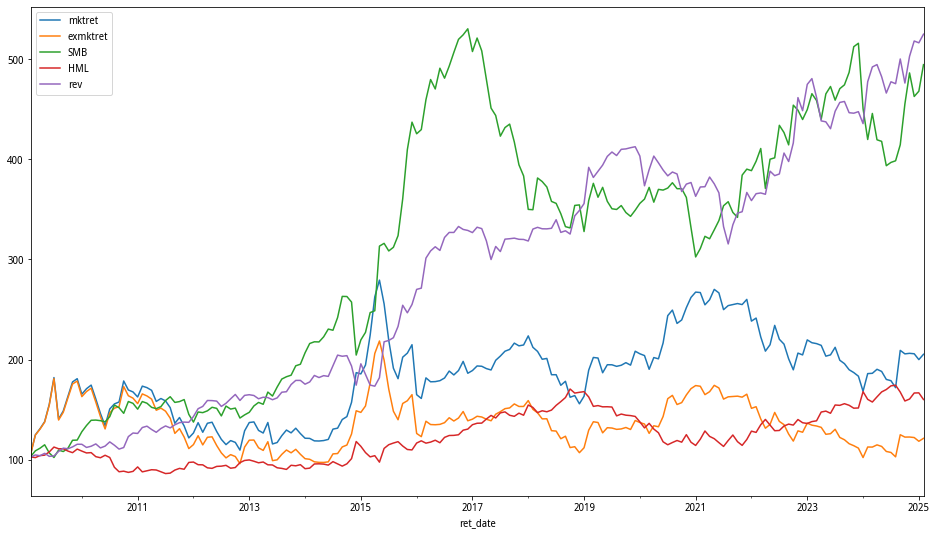

In [91]:
((1 + factors_df).cumprod()*100).plot()

In [92]:
((1 + factors_df['2018':]).cumprod()*100).plot()

## Long-only factor

In [93]:
rev_long_df = (portfolios_vwret_df['Small_LowRet'] + portfolios_vwret_df['Big_LowRet']) / 2

rev_long_df = rev_long_df.reset_index()

rev_long_df.columns=['ret_date','rev_long']

rev_long_df

ret_date  rev_long
0    2009-02  0.073752
1    2009-03  0.222602
2    2009-04  0.055581
3    2009-05  0.076523
4    2009-06  0.069063
5    2009-07  0.154281
6    2009-08 -0.157652
7    2009-09  0.057072
..       ...       ...
187  2024-09  0.250951
188  2024-10  0.020915
189  2024-11  0.058723
190  2024-12 -0.028781
191  2025-01 -0.027236
192  2025-02  0.071393
193  2025-03  0.020630
194  2025-04 -0.123483

[195 rows x 2 columns]

In [94]:
factors_long_df = pd.read_csv('./output_data/factors/ff3_long_only.csv')

factors_long_df['ret_date'] = pd.to_datetime(factors_long_df['ret_date']) 

factors_long_df['ret_date'] = factors_long_df['ret_date'].dt.to_period('M')

factors_long_df = pd.merge(factors_long_df, rev_long_df, on='ret_date')

factors_long_df['ret_date'] = factors_long_df['ret_date'].dt.to_timestamp(freq='day',how='end').dt.normalize()

factors_long_df.set_index('ret_date',inplace=True)

In [95]:
factors_long_df

mktret  exmktret  small_only  high_only  rev_long
ret_date                                                       
2009-02-28  0.058710  0.057622    0.085430   0.084536  0.073752
2009-03-31  0.178938  0.177897    0.229977   0.192277  0.222602
2009-04-30  0.048803  0.047790    0.069577   0.062876  0.055581
2009-05-31  0.054285  0.053275    0.080352   0.064899  0.076523
2009-06-30  0.126314  0.125271    0.051901   0.097641  0.069063
2009-07-31  0.170935  0.169708    0.138242   0.188059  0.154281
2009-08-31 -0.226937 -0.228372   -0.149964  -0.194644 -0.157652
2009-09-30  0.056478  0.055019    0.038860   0.047223  0.057072
...              ...       ...         ...        ...       ...
2024-07-31 -0.007093 -0.009161    0.007591   0.019830  0.013166
2024-08-31 -0.038931 -0.040999   -0.031232  -0.030772 -0.038172
2024-09-30  0.216653  0.214585    0.234804   0.194438  0.250951
2024-10-31 -0.016745 -0.018813    0.089019   0.012109  0.020915
2024-11-30  0.002654  0.000586    0.072314   0.046916  0.058723
2024-12-31 -0.002120 -0.004188   -0.052170  -0.007315 -0.028781
2025-01-31 -0.028387 -0.030455   -0.017141  -0.024264 -0.027236
2025-02-28  0.026599  0.024531    0.082804   0.034944  0.071393

[193 rows x 5 columns]

In [96]:
((1 + factors_long_df).cumprod()*100).plot()

In [97]:
((1 + factors_long_df['2018':]).cumprod()*100).plot()

In [98]:
factors_long_df.to_csv('./output_data/factors/ff3_rev_long_only.csv')

In [99]:
factors_long_df.to_pickle('./output_data/factors/ff3_rev_long_only.pkl')